<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Features" data-toc-modified-id="Features-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Features</a></span></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Predictions</a></span><ul class="toc-item"><li><span><a href="#Prediction-scores" data-toc-modified-id="Prediction-scores-0.2.1"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>Prediction scores</a></span></li><li><span><a href="#Contigs-with-differing-scores" data-toc-modified-id="Contigs-with-differing-scores-0.2.2"><span class="toc-item-num">0.2.2&nbsp;&nbsp;</span>Contigs with differing scores</a></span></li></ul></li></ul></li><li><span><a href="#Run1-contigs" data-toc-modified-id="Run1-contigs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Run1 contigs</a></span></li></ul></div>

In [1]:
threads = 4

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)
Init()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘tidytable’


The following object is masked from ‘package:stats’:

    dt


Loading required package: clustermq



In [3]:
base_dir = '/ebio/abt3_projects/databases_no-backup/DeepMAsED/version2/real_data_eval/UHGG/LLMGQC_r100/'
run1_dir = file.path(base_dir, 'rmc-sm_run1', 'map')
run2_dir = file.path(base_dir, 'rmc-sm_run2', 'features')

### Features

In [4]:
Mean = function(x){
    mean(x, na.rm=TRUE)
}

In [153]:
read_feats = function(F){
    D = strsplit(F, '/') %>% unlist
    tbl = Fread(F)
    tbl$Sample = D[14]
    tbl$MAG = D[13]
    return(tbl)
}
run1 = list_files(run1_dir, 'features.tsv.gz') %>%
    lapply(read_feats) %>%
    rbindlist(use.names=TRUE) %>%
    mutate.(RunId = 'Run1') %>%
    summarize.(contig_len = max(position, na.rm=TRUE),
               across.(where(is.numeric), Mean),
               .by=c(contig, Sample, MAG, RunId)) %>%
    select.(-position, -Extensive_misassembly)
run1

contig                         Sample    MAG              RunId contig_len
1    GUT_GENOME002320_579_CONTIG579 ERS473044 GUT_GENOME002320 Run1  3147      
2    GUT_GENOME002320_809_CONTIG809 ERS473044 GUT_GENOME002320 Run1  1996      
⋮    ⋮                              ⋮         ⋮                ⋮     ⋮         
6071 GUT_GENOME285415_11_CONTIG11   ERS436684 GUT_GENOME285415 Run1  52966     
6072 GUT_GENOME285415_12_CONTIG12   ERS436684 GUT_GENOME285415 Run1  49185     
     num_query_A num_query_C num_query_G num_query_T num_SNPs   ⋯
1    2.133418    1.999047    2.463469    2.355781    0.1829733  ⋯
2    1.958438    2.365048    1.835253    2.038057    0.1642464  ⋯
⋮    ⋮           ⋮           ⋮           ⋮           ⋮          ⋱
6071 6.090094    3.120773    4.610267    5.009874    0.09757019 ⋯
6072 4.896475    4.516387    3.273879    5.937238    0.05430407 ⋯
     min_al_score_Match mean_al_score_Match stdev_al_score_Match
1    -33.72293          -9.642952           14.21822            
2    -27.29860          -9.013737           11.19783            
⋮    ⋮                  ⋮                   ⋮                   
6071 -5.795880          -0.6944264          1.647571            
6072 -4.492396          -0.5153245          1.309795            
     max_al_score_Match num_proper_Match num_orphans_Match num_discordant_Match
1    -0.01687898        8.340216         0.5438374         0.0000000           
2    -0.82214429        7.101152         0.7496244         0.2473711           
⋮    ⋮                  ⋮                ⋮                 ⋮                   
6071 -0.006721547       18.13042         0.4974984         0.1055185           
6072 -0.004716981       18.16474         0.2103241         0.1946082           
     num_proper_SNP seq_window_entropy seq_window_perc_gc
1    0.1921855      1.509344           0.5071449         
2    0.1437156      1.512534           0.5109339         
⋮    ⋮              ⋮                  ⋮                 
6071 0.06536145     1.493624           0.4278017         
6072 0.02998821     1.497787           0.4228001

In [154]:
read_feats = function(F){
    D = strsplit(F, '/') %>% unlist
    tbl = Fread(F)
    tbl$Sample = D[13]
    tbl$MAG = D[14]
    return(tbl)
}
run2 = list_files(run2_dir, 'features.tsv.gz') %>%
    lapply(read_feats) %>%
    rbindlist(use.names=TRUE) %>%
    mutate.(RunId = 'Run2') %>%
    summarize.(contig_len = max(position, na.rm=TRUE),
               across.(where(is.numeric), Mean),
               .by=c(contig, Sample, MAG, RunId)) %>%
    select.(-position, -Extensive_misassembly)
run2

contig                       Sample     MAG              RunId contig_len
1    GUT_GENOME033371_41_CONTIG41 ERS1015705 GUT_GENOME033371 Run2  10638     
2    GUT_GENOME033371_47_CONTIG47 ERS1015705 GUT_GENOME033371 Run2   7092     
⋮    ⋮                            ⋮          ⋮                ⋮     ⋮         
6071 GUT_GENOME234989_30_CONTIG30 SRS476020  GUT_GENOME234989 Run2  51898     
6072 GUT_GENOME234989_15_CONTIG15 SRS476020  GUT_GENOME234989 Run2   8664     
     num_query_A num_query_C num_query_G num_query_T num_SNPs   ⋯
1    8.284801    6.169095    6.184416    7.468371    0.01626093 ⋯
2    7.924151    6.792753    6.413224    7.755957    0.01776399 ⋯
⋮    ⋮           ⋮           ⋮           ⋮           ⋮          ⋱
6071 2.292992    3.424883    3.789360    2.427850    0.01256286 ⋯
6072 2.375995    3.351991    3.777726    1.857126    0.02331218 ⋯
     min_al_score_Match mean_al_score_Match stdev_al_score_Match
1    -7.393119          -0.1780805          1.596910            
2    -9.065736          -0.4945733          2.042656            
⋮    ⋮                  ⋮                   ⋮                   
6071 -2.503923          -0.03998882         0.8281058           
6072 -4.659365          -0.72364743         1.7614894           
     max_al_score_Match num_proper_Match num_orphans_Match num_discordant_Match
1    -0.02904681        27.32240         0.7496945         0.1032992           
2    -0.02877698        28.00395         0.5301001         0.4181587           
⋮    ⋮                  ⋮                ⋮                 ⋮                   
6071 -0.0007518942      11.95588         0.04547294        0.02202355          
6072 -0.0217895225      11.30017         0.08032314        0.05470283          
     num_proper_SNP seq_window_entropy seq_window_perc_gc
1    0.02114860     1.488886           0.4378958         
2    0.02580008     1.522824           0.4560292         
⋮    ⋮              ⋮                  ⋮                 
6071 0.01755332     1.535640           0.6070241         
6072 0.01915753     1.487817           0.6380143

In [155]:
# merging
feats = rbindlist(list(run1, run2), use.names=TRUE)
run1 = run2 = NULL
gc()
feats

used       (Mb)   gc trigger (Mb)    max used   (Mb)   
Ncells    2358407  126.0    6428397   343.4    6428397   343.4
Vcells 1259803112 9611.6 4037441212 30803.3 5046800861 38504.1

contig                         Sample    MAG              RunId
1     GUT_GENOME002320_579_CONTIG579 ERS473044 GUT_GENOME002320 Run1 
2     GUT_GENOME002320_809_CONTIG809 ERS473044 GUT_GENOME002320 Run1 
⋮     ⋮                              ⋮         ⋮                ⋮    
12143 GUT_GENOME234989_30_CONTIG30   SRS476020 GUT_GENOME234989 Run2 
12144 GUT_GENOME234989_15_CONTIG15   SRS476020 GUT_GENOME234989 Run2 
      contig_len num_query_A num_query_C num_query_G num_query_T num_SNPs   ⋯
1     3147       2.133418    1.999047    2.463469    2.355781    0.1829733  ⋯
2     1996       1.958438    2.365048    1.835253    2.038057    0.1642464  ⋯
⋮     ⋮          ⋮           ⋮           ⋮           ⋮           ⋮          ⋱
12143 51898      2.292992    3.424883    3.789360    2.427850    0.01256286 ⋯
12144  8664      2.375995    3.351991    3.777726    1.857126    0.02331218 ⋯
      min_al_score_Match mean_al_score_Match stdev_al_score_Match
1     -33.72293          -9.642952           14.21822            
2     -27.29860          -9.013737           11.19783            
⋮     ⋮                  ⋮                   ⋮                   
12143 -2.503923          -0.03998882         0.8281058           
12144 -4.659365          -0.72364743         1.7614894           
      max_al_score_Match num_proper_Match num_orphans_Match
1     -0.01687898        8.340216         0.5438374        
2     -0.82214429        7.101152         0.7496244        
⋮     ⋮                  ⋮                ⋮                
12143 -0.0007518942      11.95588         0.04547294       
12144 -0.0217895225      11.30017         0.08032314       
      num_discordant_Match num_proper_SNP seq_window_entropy seq_window_perc_gc
1     0.0000000            0.1921855      1.509344           0.5071449         
2     0.2473711            0.1437156      1.512534           0.5109339         
⋮     ⋮                    ⋮              ⋮                  ⋮                 
12143 0.02202355           0.01755332     1.535640           0.6070241         
12144 0.05470283           0.01915753     1.487817           0.6380143

### Predictions

In [171]:
F1 = file.path(dirname(run1_dir), 'uhgg_eval_run1.csv')
F2 = file.path(dirname(run2_dir), 'uhgg_eval_run2.csv')
preds = rbindlist(list(
    Fread(F1, sep=',') %>% mutate.(RunId = 'Run1'),
    Fread(F2, sep=',') %>% mutate.(RunId = 'Run2')
    ), use.names=TRUE) %>%
    mutate.(contig = gsub('.+/', '', cont_name)) %>%
    select.(contig, score, RunId)
preds

contig                         score     RunId
1     GUT_GENOME198186_113_CONTIG113 0.7753407 Run1 
2     GUT_GENOME198186_97_CONTIG97   0.5204630 Run1 
⋮     ⋮                              ⋮         ⋮    
12143 GUT_GENOME161616_57_CONTIG57   0.5045585 Run2 
12144 GUT_GENOME161616_58_CONTIG58   0.1211948 Run2

In [172]:
# checking overlap
overlap(preds$contig, feats$contig)

intersect(x,y): 6072 
setdiff(x,y): 0 
setdiff(y,x): 0 
union(x,y): 6072 


In [173]:
# adding contig basic info
preds = preds %>%
    inner_join.(feats %>% select.(contig, Sample, MAG, RunId, contig_len),
                c('contig', 'RunId'))
preds

contig                         score       RunId Sample   
1     GUT_GENOME002320_579_CONTIG579 0.179540128 Run1  ERS473044
2     GUT_GENOME002320_809_CONTIG809 0.004084681 Run1  ERS473044
⋮     ⋮                              ⋮           ⋮     ⋮        
12143 GUT_GENOME234989_30_CONTIG30   0.8682532   Run2  SRS476020
12144 GUT_GENOME234989_15_CONTIG15   0.7709932   Run2  SRS476020
      MAG              contig_len
1     GUT_GENOME002320 3147      
2     GUT_GENOME002320 1996      
⋮     ⋮                ⋮         
12143 GUT_GENOME234989 51898     
12144 GUT_GENOME234989  8664

#### Prediction scores

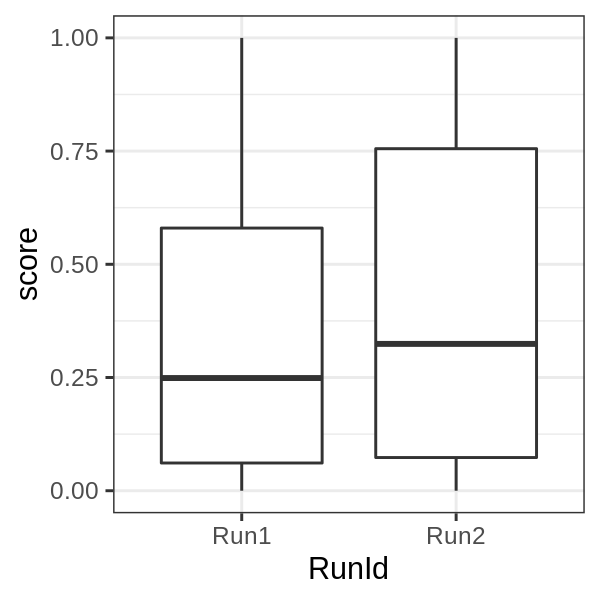

In [174]:
# summary
p = preds %>%
    ggplot(aes(RunId, score)) +
    geom_boxplot() +
    theme_bw()
p.dims(3,3)
plot(p)

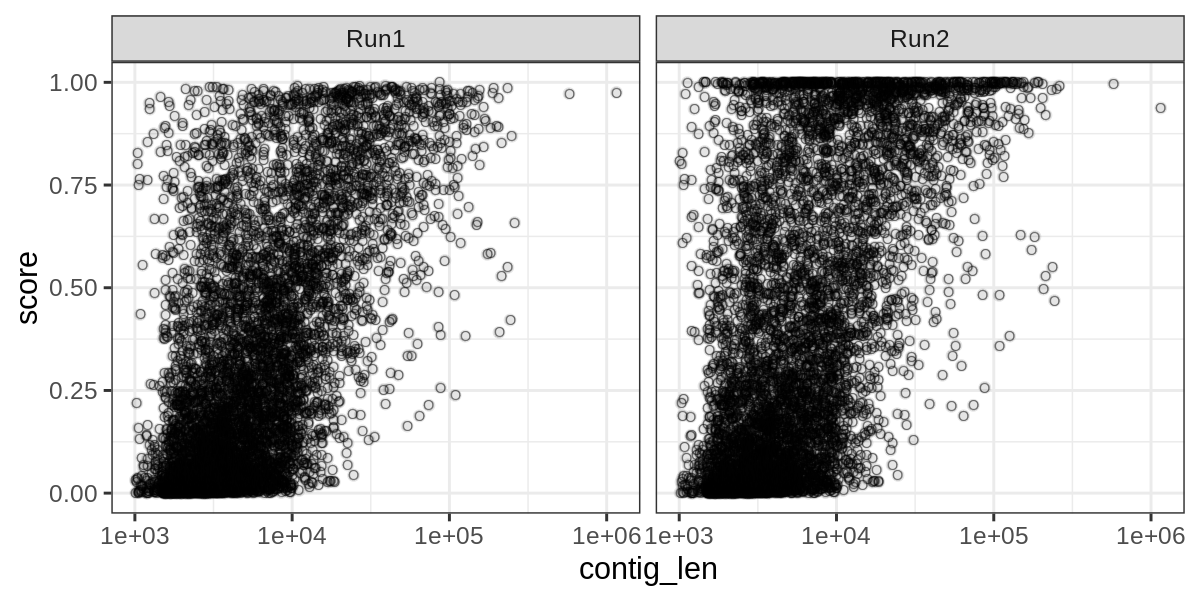

In [182]:
# summary
p = preds %>%
    ggplot(aes(contig_len, score)) +
    geom_point(alpha=0.1) +
    geom_point(alpha=0.5, shape='O') +
    scale_x_log10() +
    facet_wrap(~ RunId) +
    theme_bw()
p.dims(6,3)
plot(p)

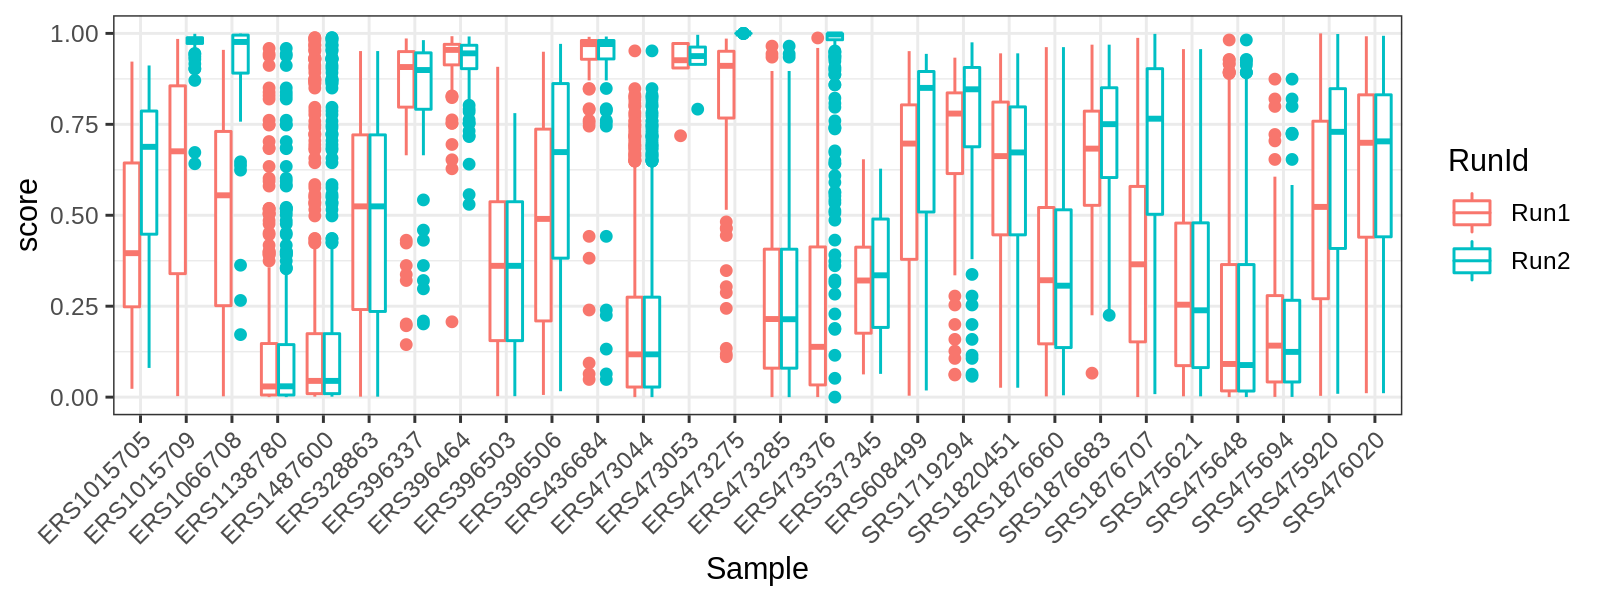

In [183]:
# summary by sample
p = preds %>%
    ggplot(aes(Sample, score, color=RunId)) +
    geom_boxplot() +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(8,3)
plot(p)

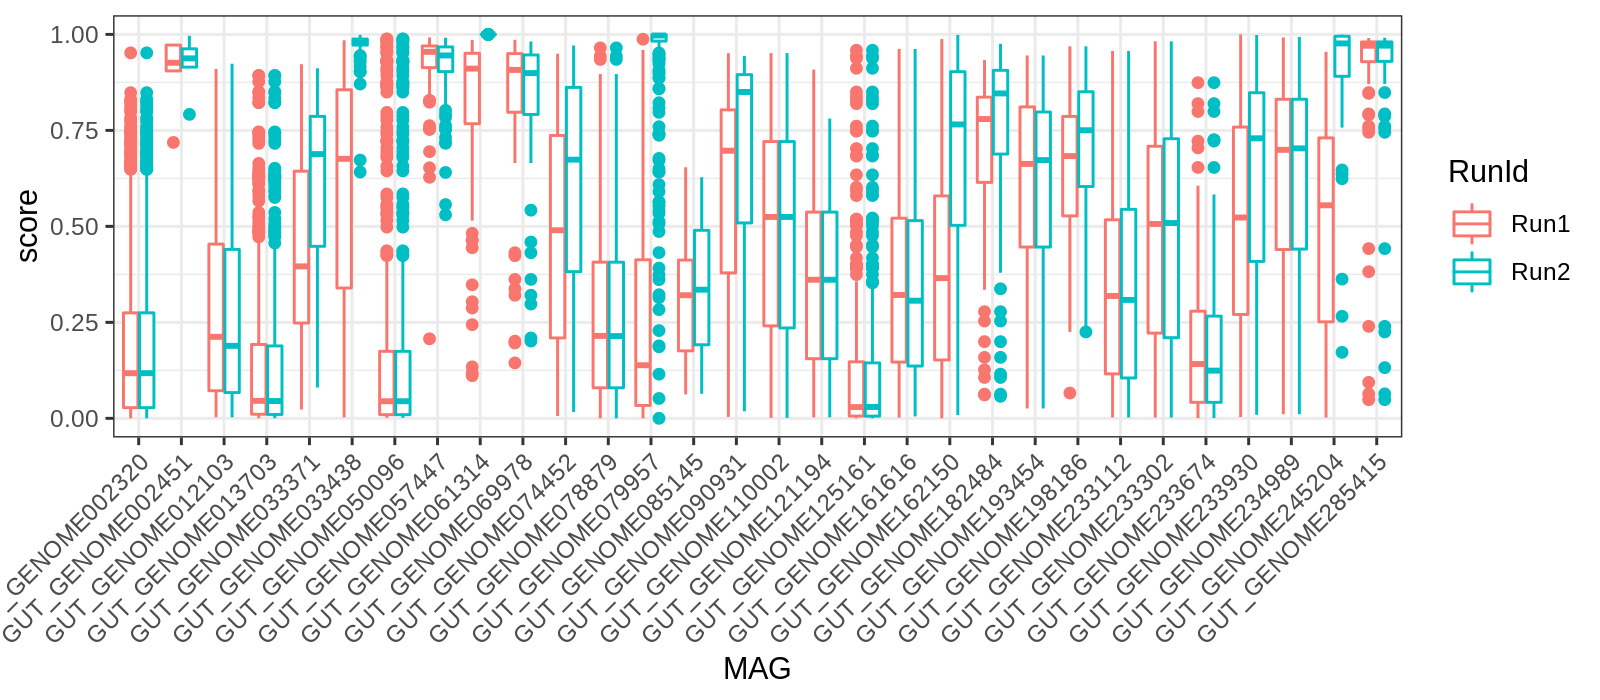

In [184]:
# summary by MAG
p = preds %>%
    ggplot(aes(MAG, score, color=RunId)) +
    geom_boxplot() +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1)
    )
p.dims(8,3.5)
plot(p)

#### Contigs with differing scores

In [185]:
# re-formatting
preds_w = preds %>%
    pivot_wider.(names_from=RunId, values_from=score) 
preds_w

contig                         Sample    MAG              contig_len
1    GUT_GENOME002320_100_CONTIG100 ERS473044 GUT_GENOME002320 9349      
2    GUT_GENOME002320_101_CONTIG101 ERS473044 GUT_GENOME002320 9323      
⋮    ⋮                              ⋮         ⋮                ⋮         
6071 GUT_GENOME285415_90_CONTIG90   ERS436684 GUT_GENOME285415  1583     
6072 GUT_GENOME285415_9_CONTIG9     ERS436684 GUT_GENOME285415 57010     
     Run1      Run2     
1    0.2476606 0.2476606
2    0.1258000 0.1258000
⋮    ⋮         ⋮        
6071 0.8464658 0.7869321
6072 0.9867112 0.9867112

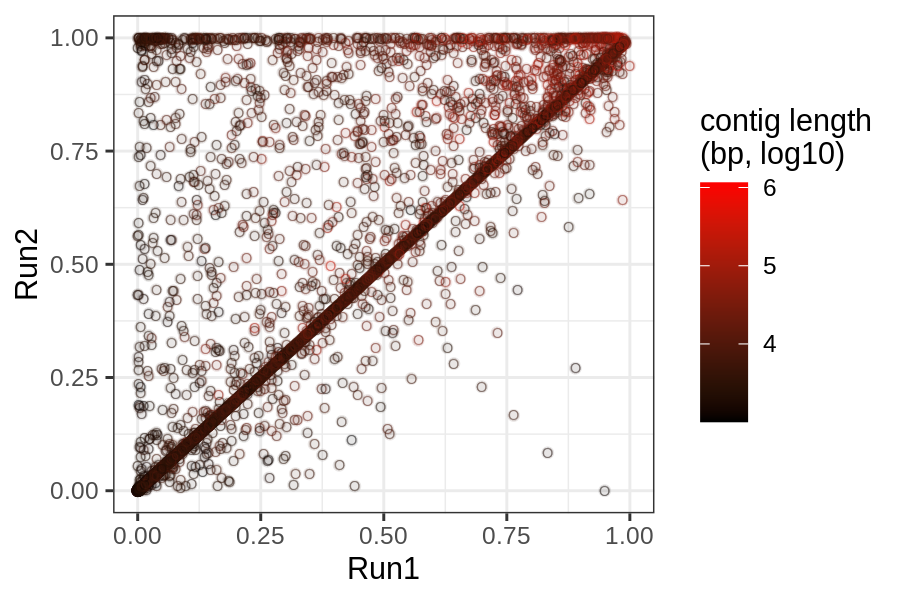

In [191]:
# comparing
p = preds_w %>%
    ggplot(aes(Run1, Run2, color=log10(contig_len))) +
    geom_point(alpha=0.1) +
    geom_point(alpha=0.5, shape='O') +
    scale_color_continuous('contig length\n(bp, log10)', low='black', high='red') +
    theme_bw()
p.dims(4.5,3)
plot(p)

In [192]:
preds_wf = preds_w %>%
    filter.(Run1 != Run2)
preds_wf

contig                         Sample    MAG              contig_len
1    GUT_GENOME002320_417_CONTIG417 ERS473044 GUT_GENOME002320 4212      
2    GUT_GENOME002320_426_CONTIG426 ERS473044 GUT_GENOME002320 4155      
⋮    ⋮                              ⋮         ⋮                ⋮         
2061 GUT_GENOME285415_88_CONTIG88   ERS436684 GUT_GENOME285415 1594      
2062 GUT_GENOME285415_90_CONTIG90   ERS436684 GUT_GENOME285415 1583      
     Run1        Run2       
1    0.187816009 0.187815994
2    0.004497144 0.004497143
⋮    ⋮           ⋮          
2061 0.3819798   0.2249819  
2062 0.8464658   0.7869321

In [193]:
# adding predictions
feats_f = feats %>%
    inner_join.(preds_w %>% 
                    mutate.(scores_differ = Run1 != Run2) %>%
                    select.(contig, Sample, MAG, scores_differ),
                c('contig', 'Sample', 'MAG'))
feats_f

contig                         Sample    MAG              RunId
1     GUT_GENOME002320_100_CONTIG100 ERS473044 GUT_GENOME002320 Run1 
2     GUT_GENOME002320_100_CONTIG100 ERS473044 GUT_GENOME002320 Run2 
⋮     ⋮                              ⋮         ⋮                ⋮    
12143 GUT_GENOME285415_9_CONTIG9     ERS436684 GUT_GENOME285415 Run1 
12144 GUT_GENOME285415_9_CONTIG9     ERS436684 GUT_GENOME285415 Run2 
      contig_len num_query_A num_query_C num_query_G num_query_T num_SNPs   ⋯
1     9349       2.802246    2.087594    2.856257    2.459144    0.1365775  ⋯
2     9349       2.802246    2.087594    2.856257    2.459144    0.1365775  ⋯
⋮     ⋮          ⋮           ⋮           ⋮           ⋮           ⋮          ⋱
12143 57010      5.06176     2.884268    4.12338     4.477171    0.01050674 ⋯
12144 57010      5.06176     2.884268    4.12338     4.477171    0.01050674 ⋯
      mean_al_score_Match stdev_al_score_Match max_al_score_Match
1     -6.217265           11.08674             -0.03244806       
2     -6.217265           11.08674             -0.03244806       
⋮     ⋮                   ⋮                    ⋮                 
12143 -0.1561973          1.022529             -0.01087529       
12144 -0.1561973          1.022529             -0.01087529       
      num_proper_Match num_orphans_Match num_discordant_Match num_proper_SNP
1     9.768128         0.2406417         0.1640642            0.1390374     
2     9.768128         0.2406417         0.1640642            0.1390374     
⋮     ⋮                ⋮                 ⋮                    ⋮             
12143 16.32541         0.04544737        0.1652137            0.00517444    
12144 16.32541         0.04544737        0.1652137            0.00517444    
      seq_window_entropy seq_window_perc_gc scores_differ
1     1.504669           0.4921125          FALSE        
2     1.504669           0.4921125          FALSE        
⋮     ⋮                  ⋮                  ⋮            
12143 1.49106            0.4325139          FALSE        
12144 1.49106            0.4325139          FALSE

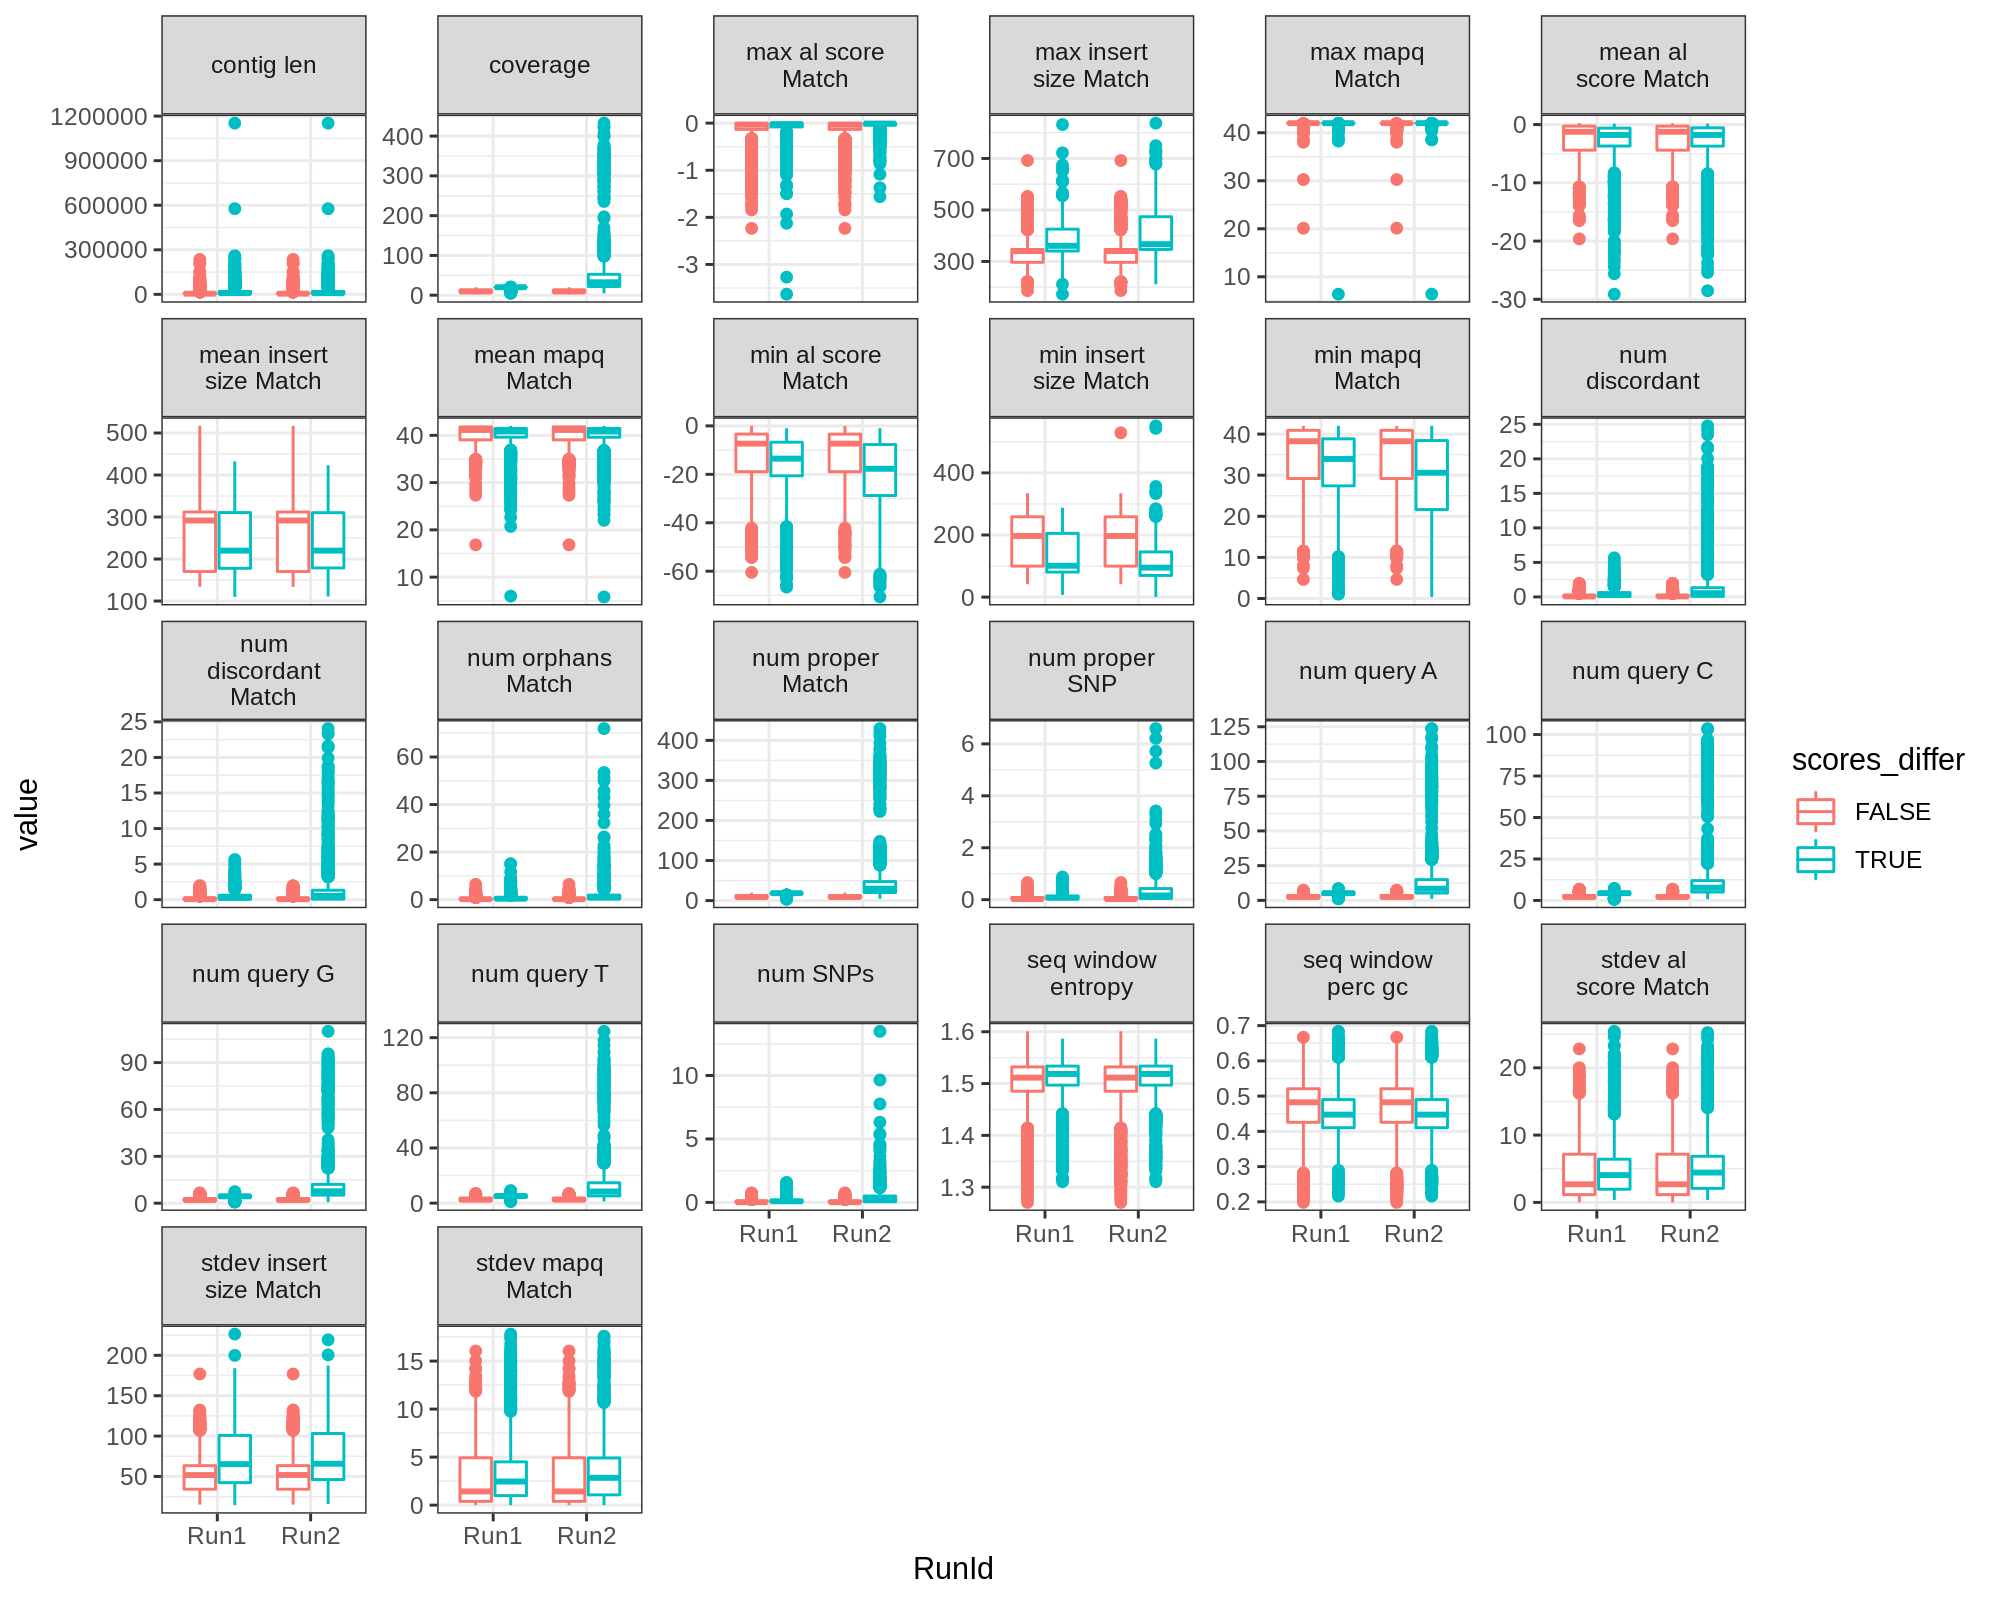

In [194]:
# all features
p = feats_f %>%
    pivot_longer.(cols=c(-contig, -Sample, -MAG, -RunId, -scores_differ)) %>%
    mutate.(name = gsub('_', ' ', name),
            name = stringr::str_wrap(name, 12)) %>%
    ggplot(aes(RunId, value, color=scores_differ)) +
    geom_boxplot() +
    facet_wrap(~ name, scales='free_y') +
    theme_bw()
p.dims(10,8)
plot(p)

## Run1 contigs

In [200]:
# adding predictions
feats_f = feats %>%
    filter.(RunId == 'Run1') %>%
    inner_join.(preds, c('contig', 'Sample', 'MAG', 'RunId', 'contig_len')) %>%
    select.(-RunId)
feats_f

contig                         Sample    MAG              contig_len
1    GUT_GENOME002320_579_CONTIG579 ERS473044 GUT_GENOME002320 3147      
2    GUT_GENOME002320_809_CONTIG809 ERS473044 GUT_GENOME002320 1996      
⋮    ⋮                              ⋮         ⋮                ⋮         
6071 GUT_GENOME285415_11_CONTIG11   ERS436684 GUT_GENOME285415 52966     
6072 GUT_GENOME285415_12_CONTIG12   ERS436684 GUT_GENOME285415 49185     
     num_query_A num_query_C num_query_G num_query_T num_SNPs   coverage ⋯
1    2.133418    1.999047    2.463469    2.355781    0.1829733  9.081004 ⋯
2    1.958438    2.365048    1.835253    2.038057    0.1642464  8.276415 ⋯
⋮    ⋮           ⋮           ⋮           ⋮           ⋮          ⋮        ⋱
6071 6.090094    3.120773    4.610267    5.009874    0.09757019 18.83276 ⋯
6072 4.896475    4.516387    3.273879    5.937238    0.05430407 18.62455 ⋯
     mean_al_score_Match stdev_al_score_Match max_al_score_Match
1    -9.642952           14.21822             -0.01687898       
2    -9.013737           11.19783             -0.82214429       
⋮    ⋮                   ⋮                    ⋮                 
6071 -0.6944264          1.647571             -0.006721547      
6072 -0.5153245          1.309795             -0.004716981      
     num_proper_Match num_orphans_Match num_discordant_Match num_proper_SNP
1    8.340216         0.5438374         0.0000000            0.1921855     
2    7.101152         0.7496244         0.2473711            0.1437156     
⋮    ⋮                ⋮                 ⋮                    ⋮             
6071 18.13042         0.4974984         0.1055185            0.06536145    
6072 18.16474         0.2103241         0.1946082            0.02998821    
     seq_window_entropy seq_window_perc_gc score      
1    1.509344           0.5071449          0.179540128
2    1.512534           0.5109339          0.004084681
⋮    ⋮                  ⋮                  ⋮          
6071 1.493624           0.4278017          0.9890518  
6072 1.497787           0.4228001          0.9795358

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



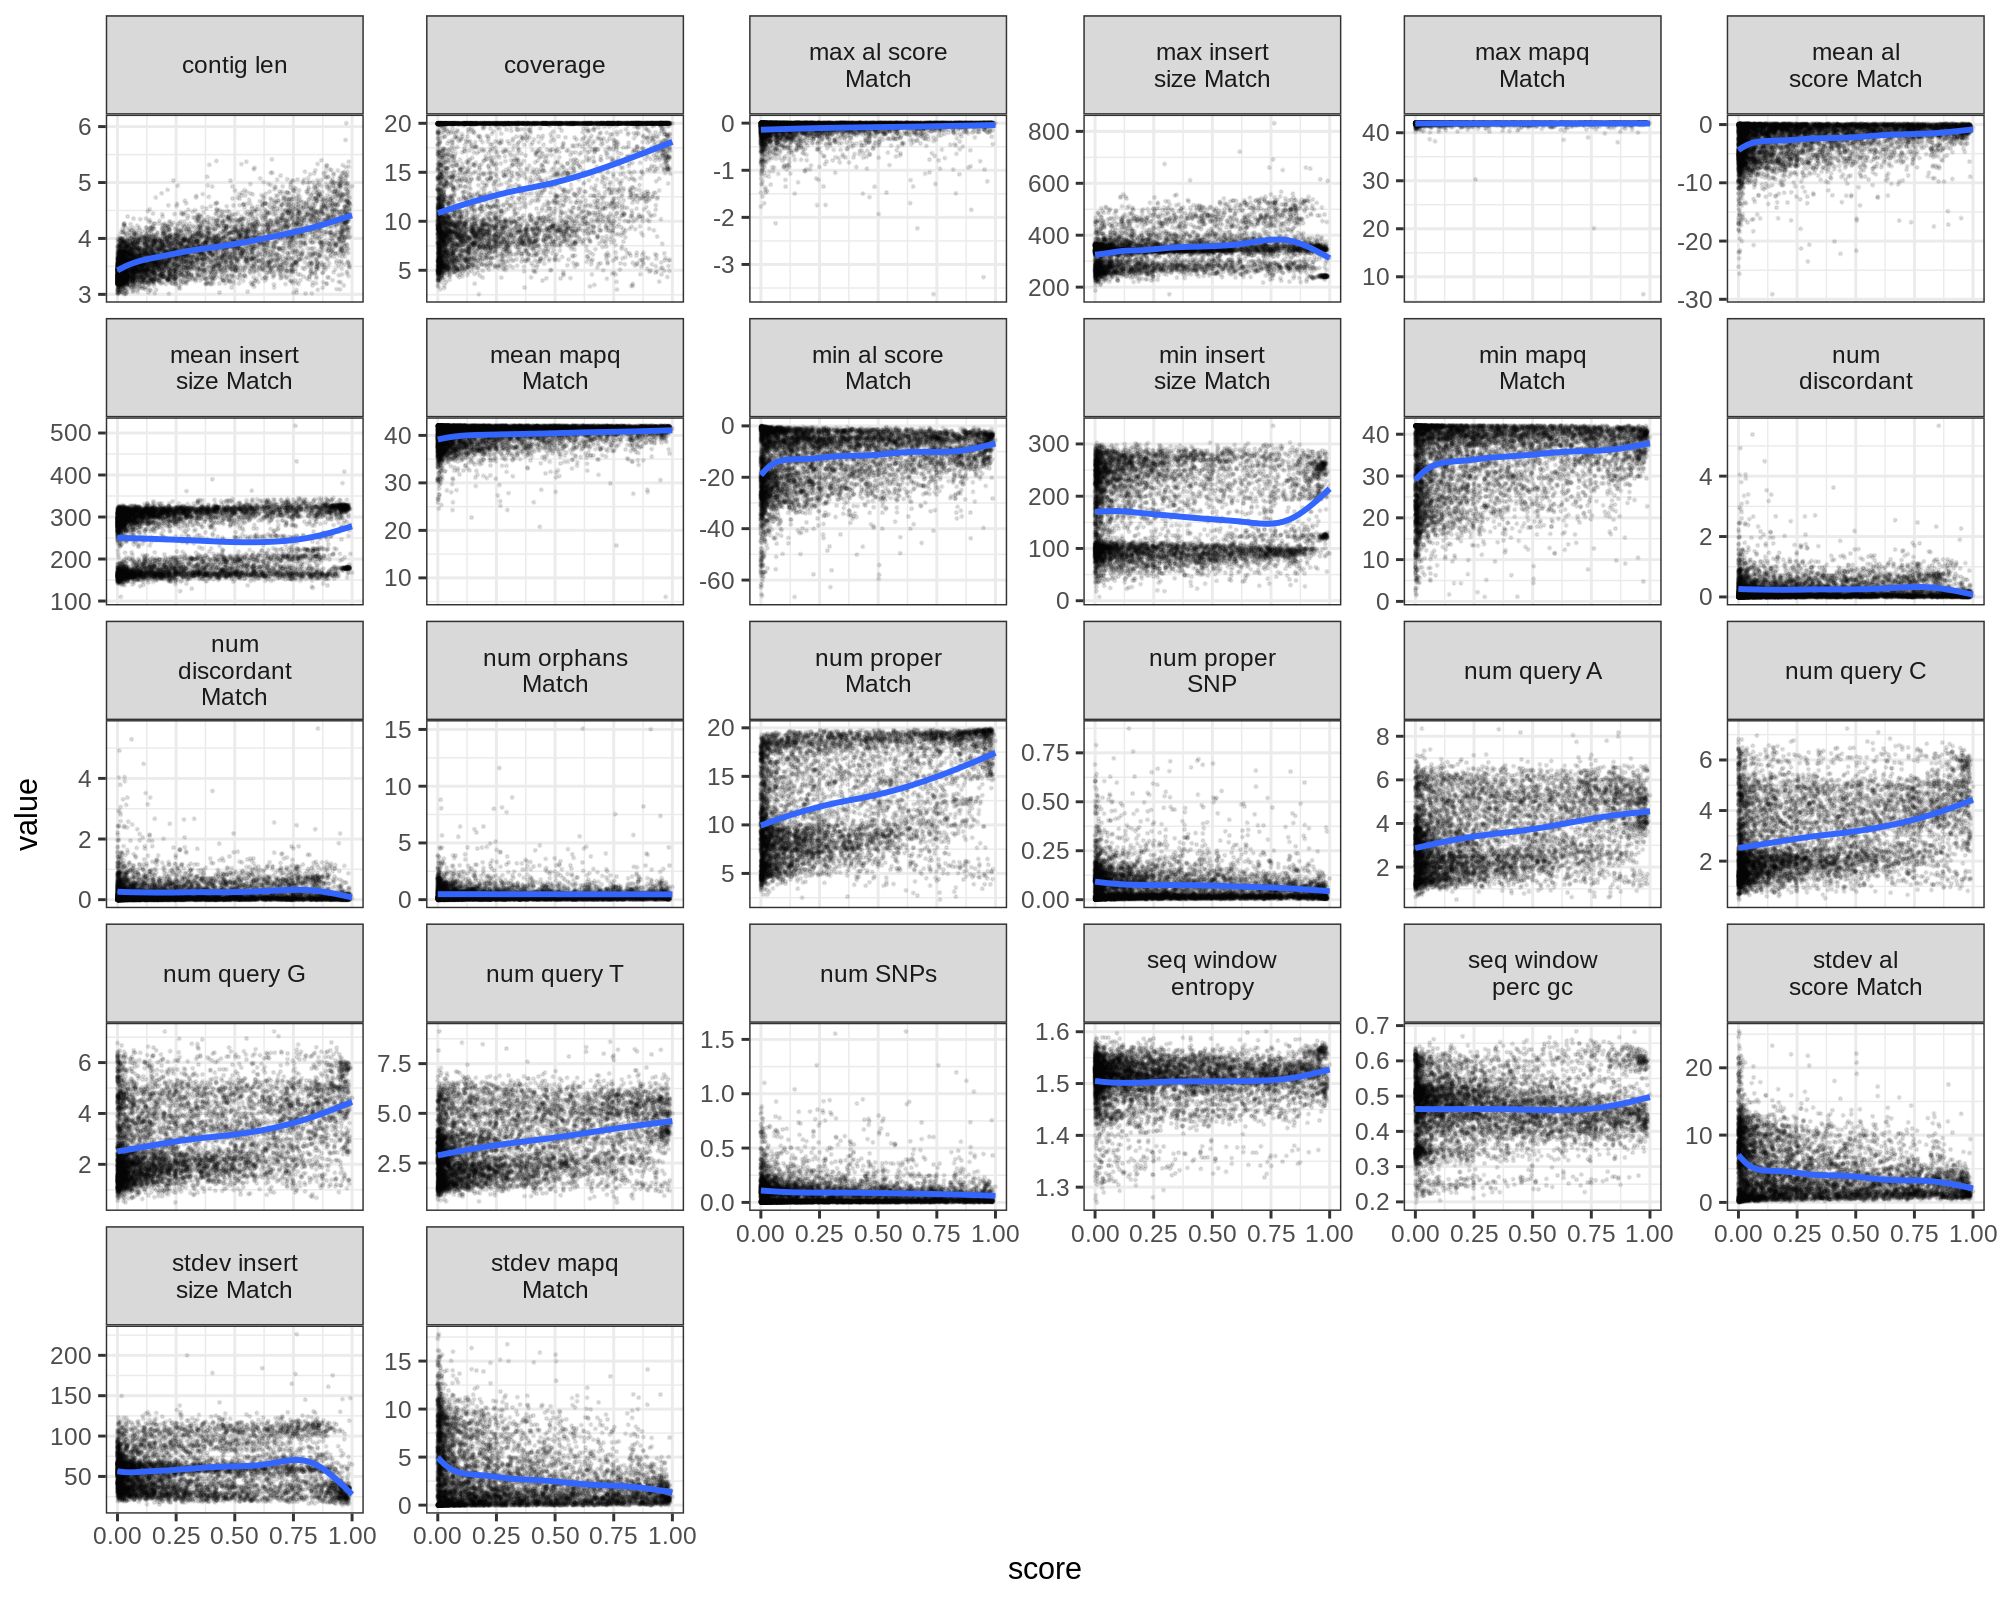

In [201]:
# all features
p = feats_f %>%
    mutate.(contig_len = log10(contig_len)) %>%
    pivot_longer.(cols=c(-contig, -Sample, -MAG, -score)) %>%
    mutate.(name = gsub('_', ' ', name),
            name = stringr::str_wrap(name, 12)) %>%
    ggplot(aes(score, value)) +
    geom_point(alpha=0.1, size=0.2) +
    geom_smooth() +
    facet_wrap(~ name, scales='free_y') +
    theme_bw()
p.dims(10,8)
plot(p)

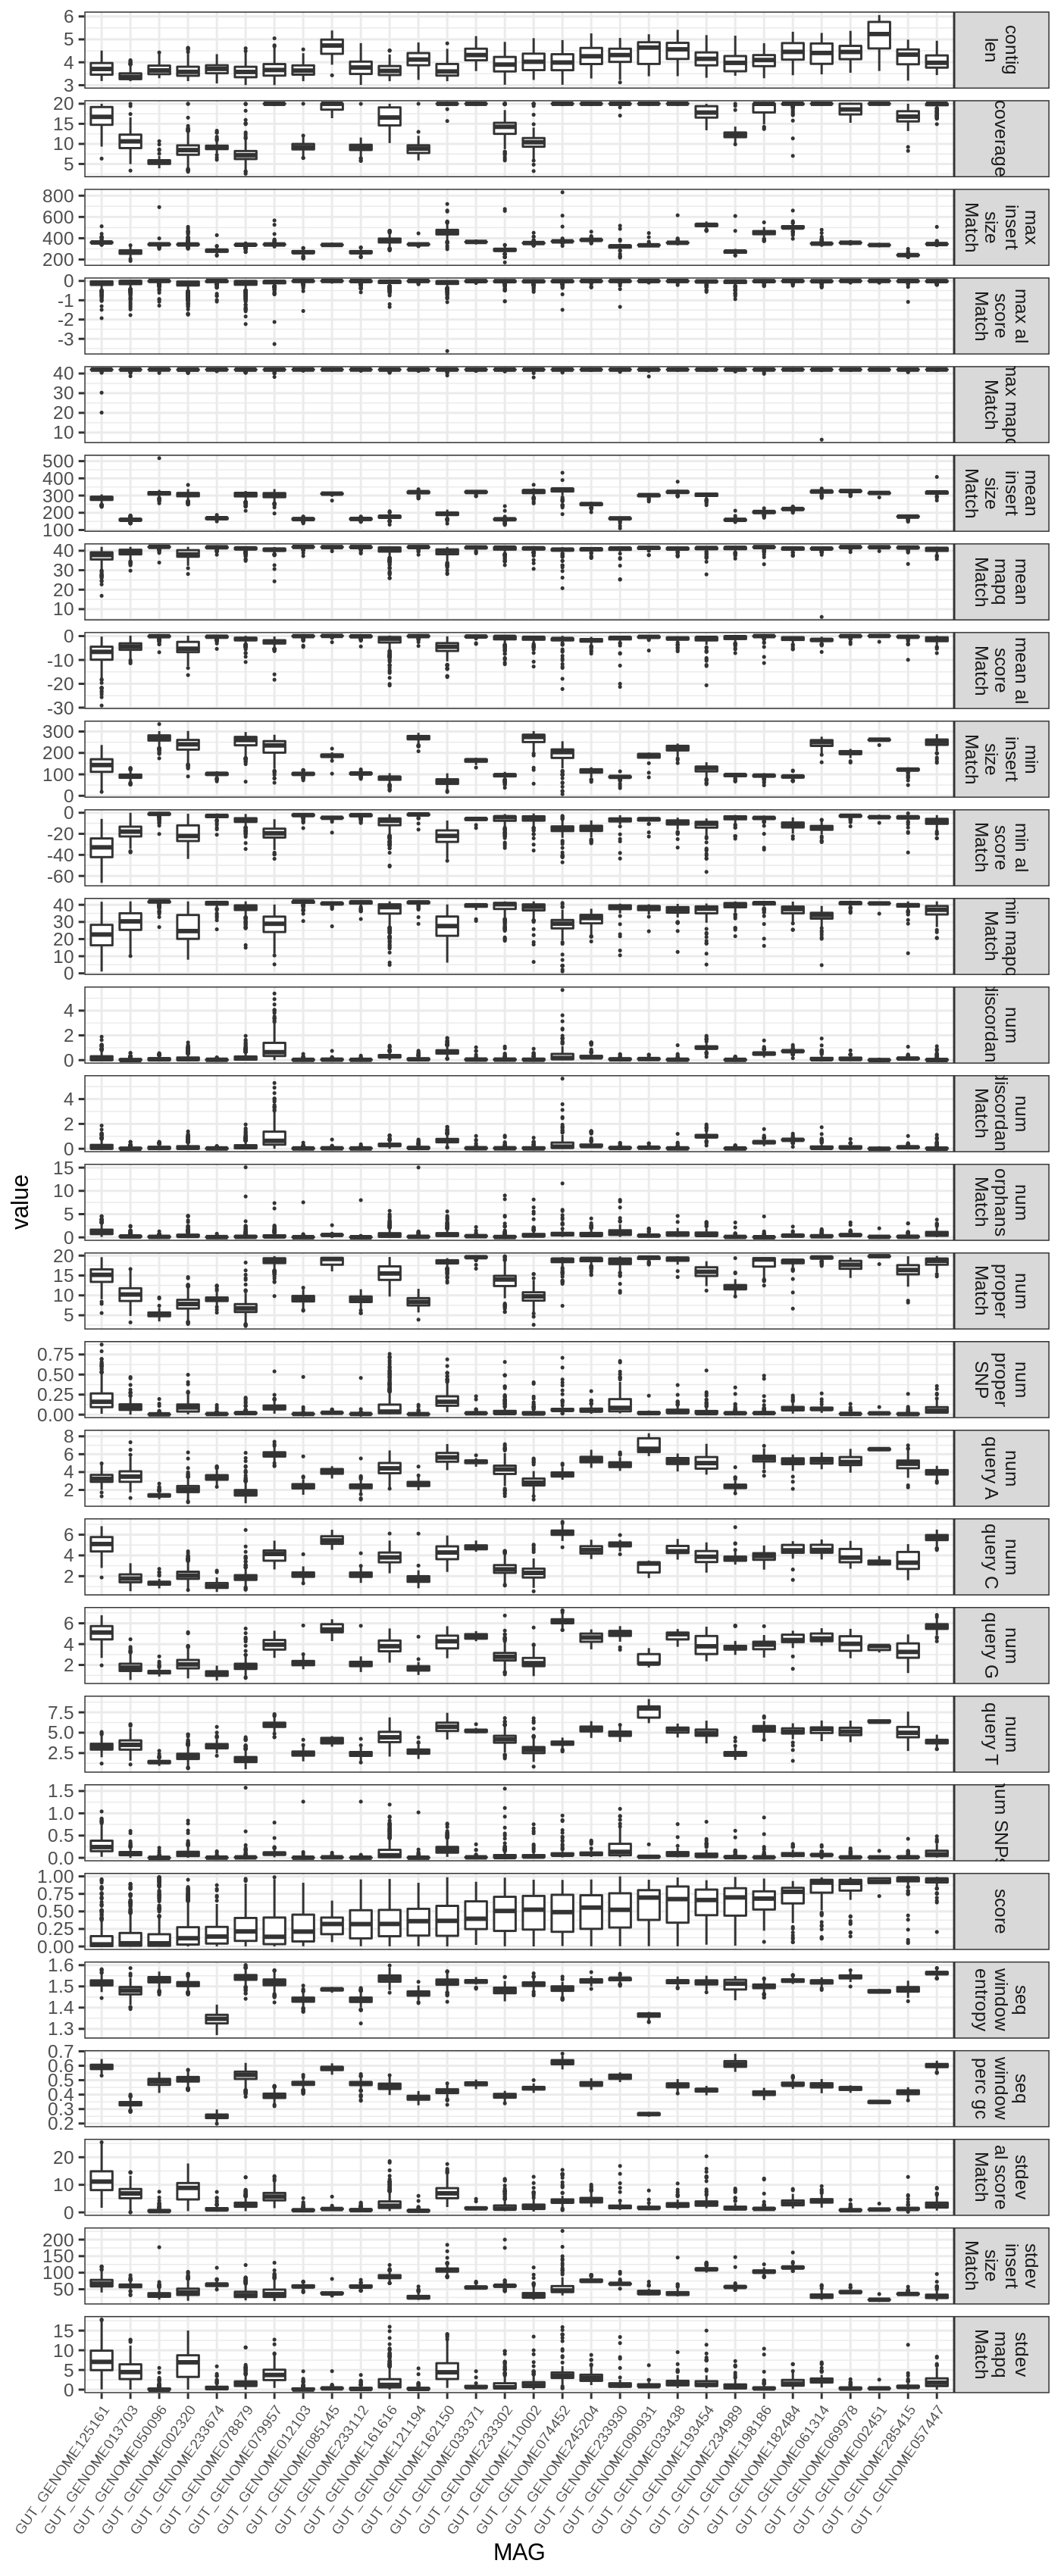

In [202]:
# all features
p = feats_f %>%
    mutate.(contig_len = log10(contig_len)) %>%
    mutate.(mean_score = mean(score),
            .by=c(MAG)) %>%   
    pivot_longer.(cols=c(-contig, -Sample, -MAG, -mean_score)) %>%
    mutate.(name = gsub('_', ' ', name),
            name = stringr::str_wrap(name, 8)) %>%
    mutate.(MAG = reorder(MAG, mean_score)) %>%
    ggplot(aes(MAG, value)) +
    geom_boxplot(outlier.size = 0.2) +
    facet_grid(name ~ ., scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=55, hjust=1, size=7)
    )
p.dims(7,17)
plot(p)

In [248]:
feats_f %>%
    summarize.(mean_score = mean(score),
               stderr_score = sd(score)/sqrt(contig %>% unique %>% length),
               n_contigs = contig %>% unique %>% length,
               .by = c(MAG, Sample)) 

MAG              Sample     mean_score stderr_score n_contigs
1  GUT_GENOME002320 ERS473044  0.1865187  0.006599289  923      
2  GUT_GENOME002451 ERS473053  0.8994494  0.047168610    5      
⋮  ⋮                ⋮          ⋮          ⋮            ⋮        
29 GUT_GENOME245204 ERS1066708 0.4897179  0.02679709   117      
30 GUT_GENOME285415 ERS436684  0.9009232  0.02076114    90

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



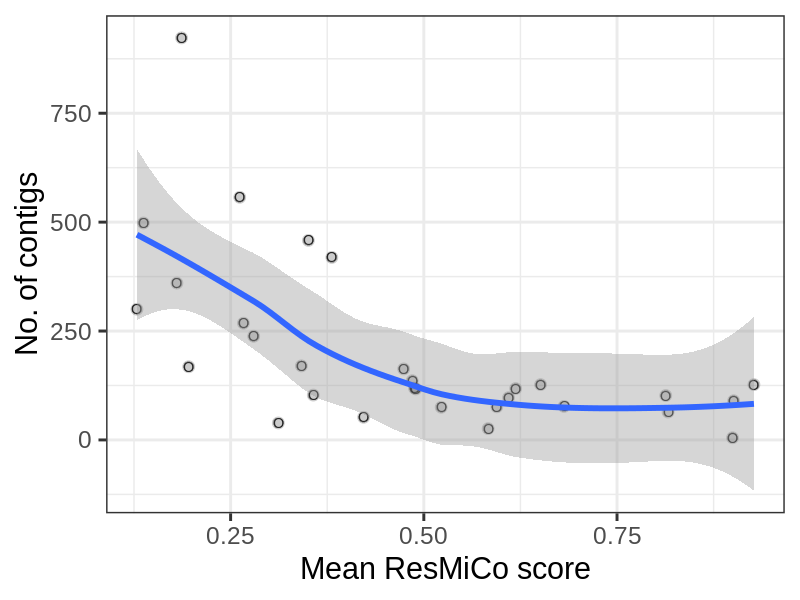

In [260]:
# all features
p = feats_f %>%
    summarize.(mean_score = mean(score),
               stderr_score = sd(score)/sqrt(contig %>% unique %>% length),
               n_contigs = contig %>% unique %>% length,
               .by = c(MAG, Sample)) %>%
    ggplot(aes(mean_score, n_contigs)) +
    geom_point(alpha=0.2) +
    geom_point(alpha=0.8, shape='O') +
    geom_smooth() +
    labs(x='Mean ResMiCo score', y='No. of contigs') +
    theme_bw() 
p.dims(4,3)
plot(p)

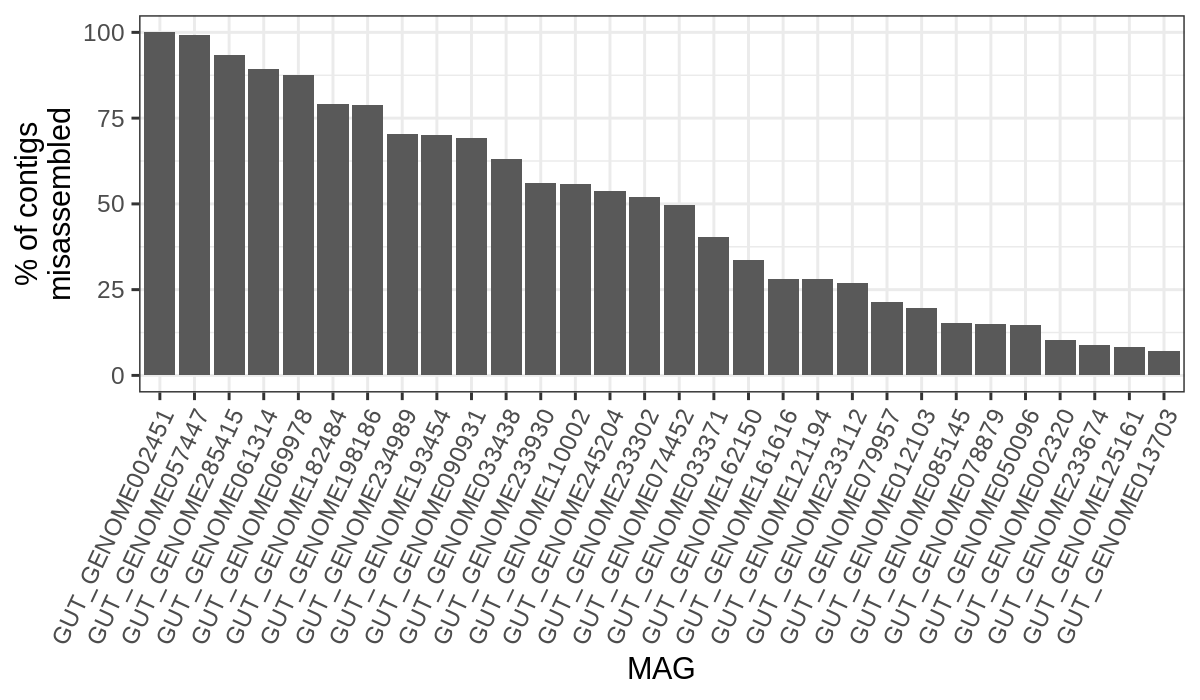

In [276]:
# all features
p = feats_f %>%
    summarize.(misasmbl = score > 0.5,
               .by = c(MAG, Sample, contig)) %>%
    summarize.(perc_mis = sum(misasmbl) / length(contig) * 100,
               .by = c(MAG, Sample)) %>%
    mutate.(MAG = reorder(MAG, -perc_mis)) %>%
    ggplot(aes(MAG, perc_mis)) +
    geom_bar(stat='identity') +
    labs(x='MAG', y='% of contigs\nmisassembled') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=65, hjust=1)
    )
p.dims(6,3.5)
plot(p)

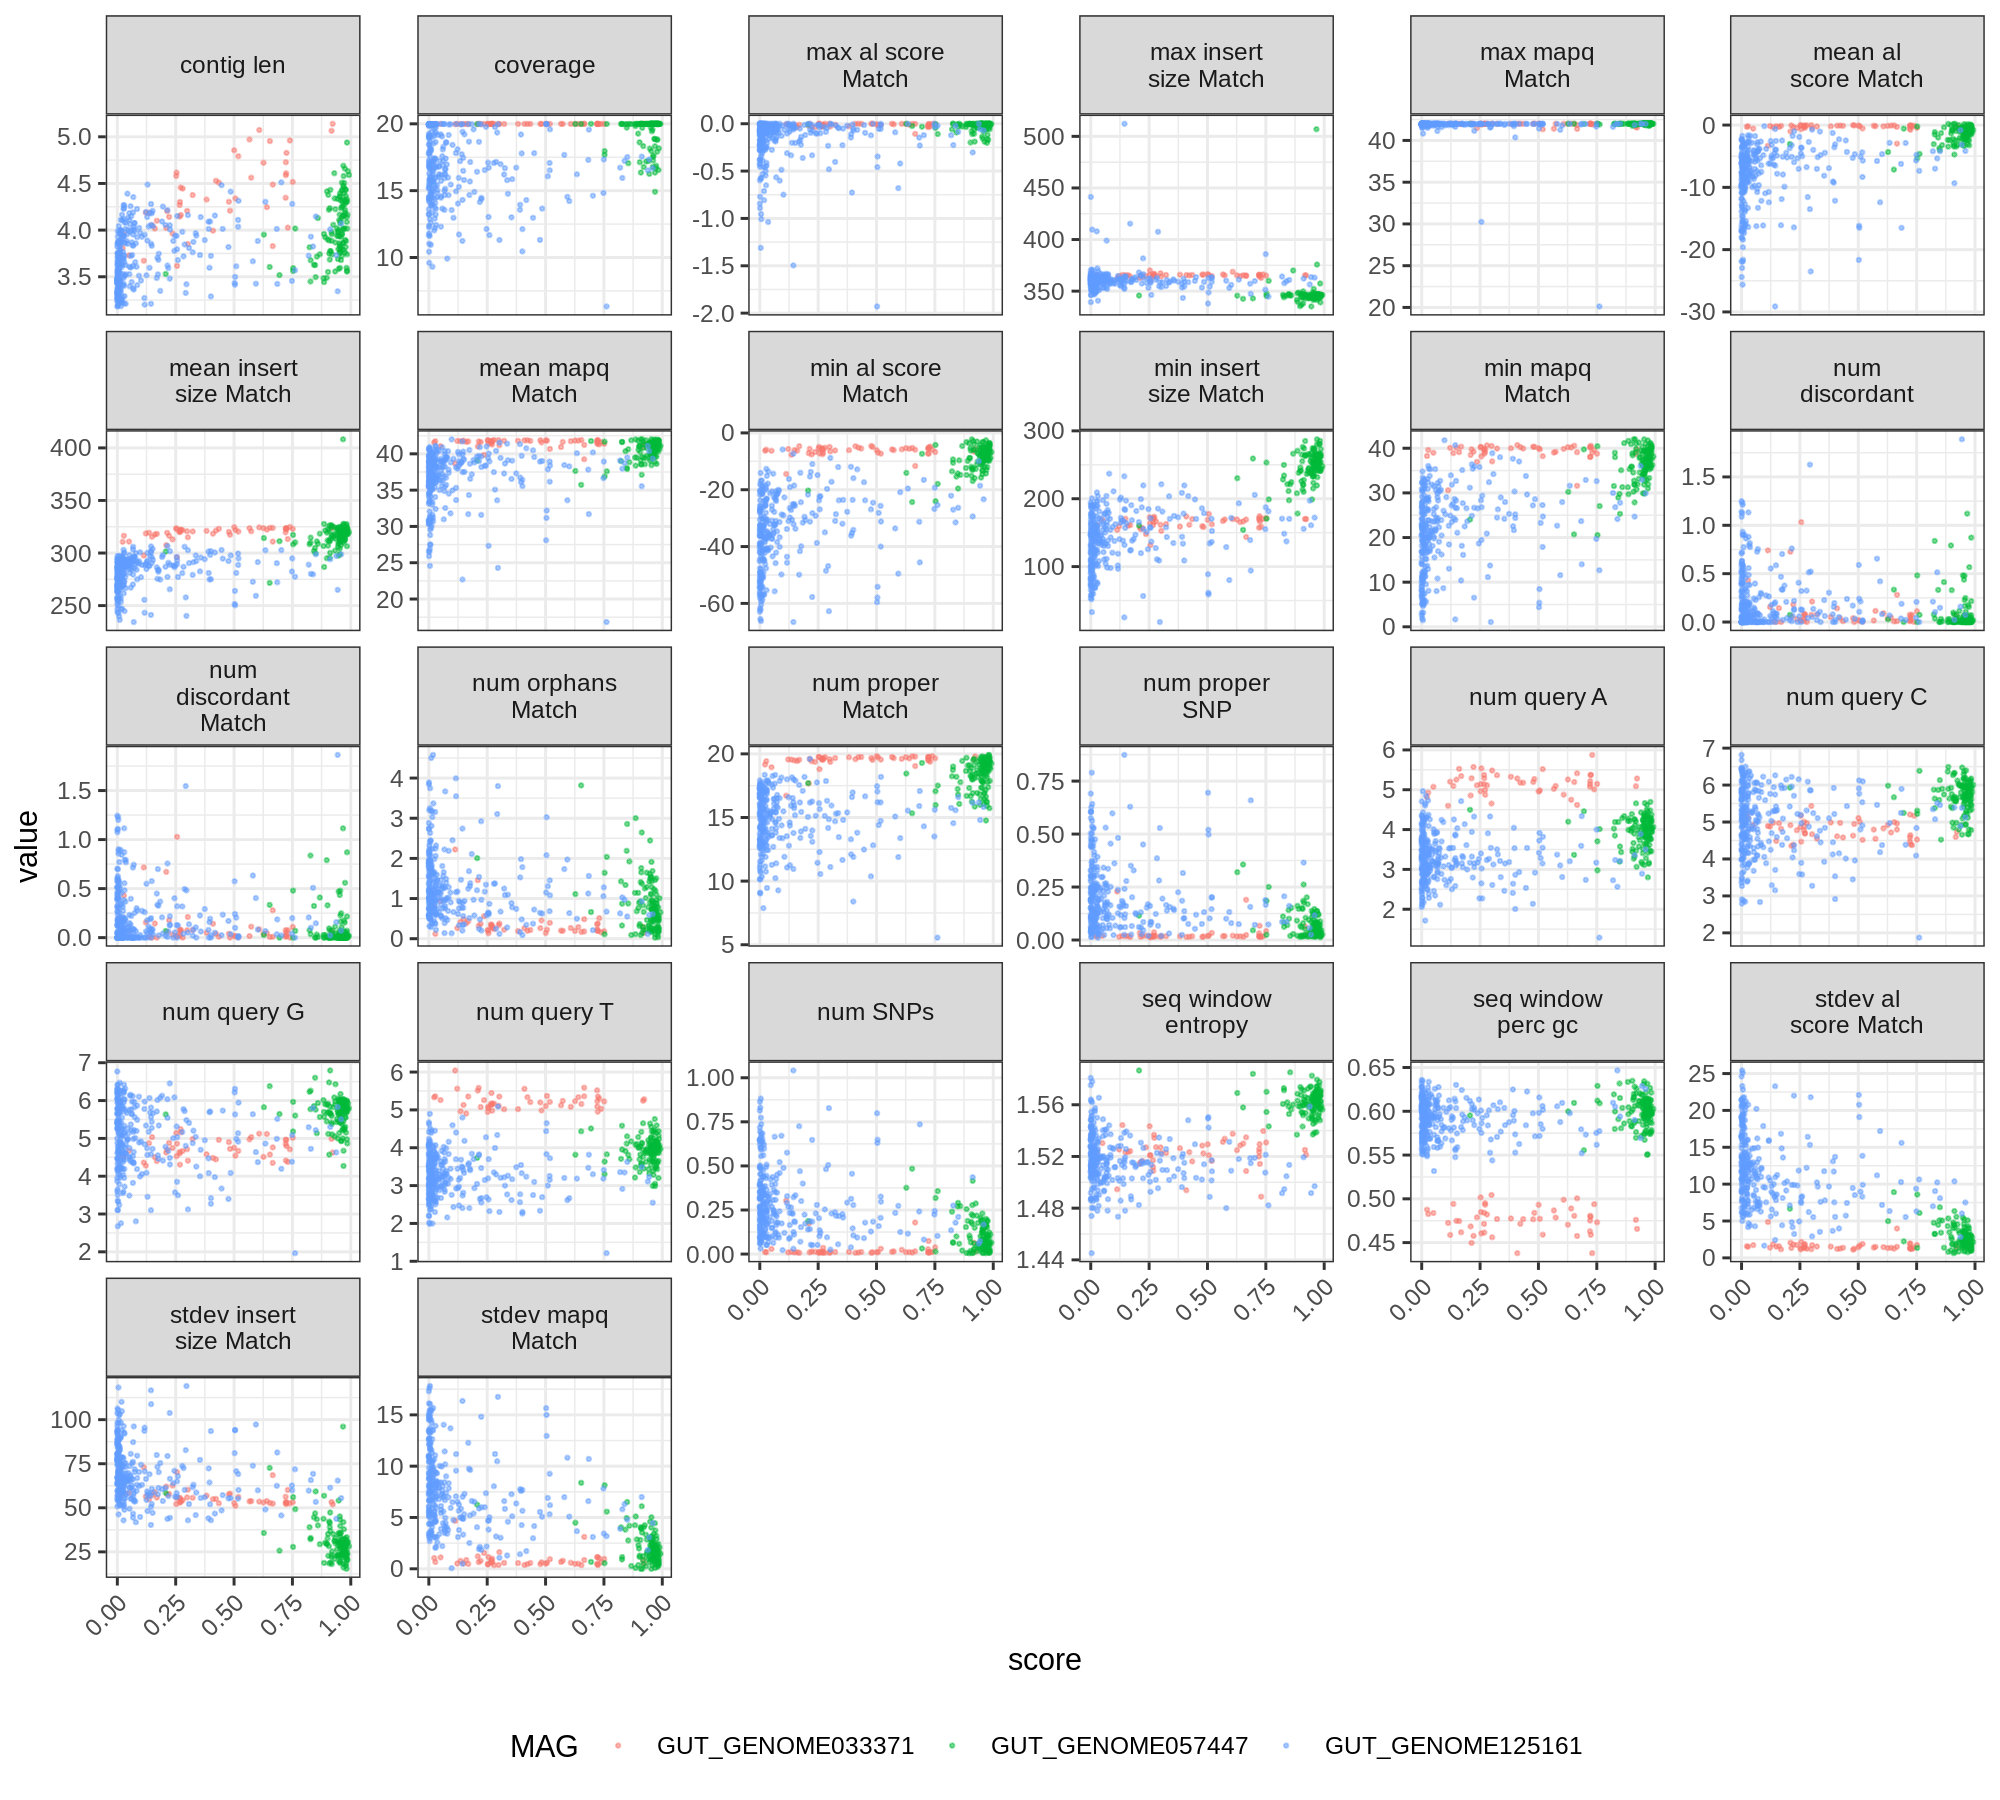

In [231]:
# all features for outlier 
p = feats_f %>%
    filter.(MAG %in% c('GUT_GENOME057447', 'GUT_GENOME033371', 'GUT_GENOME125161'))  %>%
    mutate.(contig_len = log10(contig_len)) %>%
    pivot_longer.(cols=c(-contig, -Sample, -MAG, -score)) %>%
    mutate.(name = gsub('_', ' ', name),
            name = stringr::str_wrap(name, 12)) %>%
    ggplot(aes(score, value, color=MAG)) +
    geom_point(alpha=0.5, size=0.4) +
    #geom_smooth() +
    facet_wrap(~ name, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1),
        legend.position = 'bottom'
    )
p.dims(10,9)
plot(p)

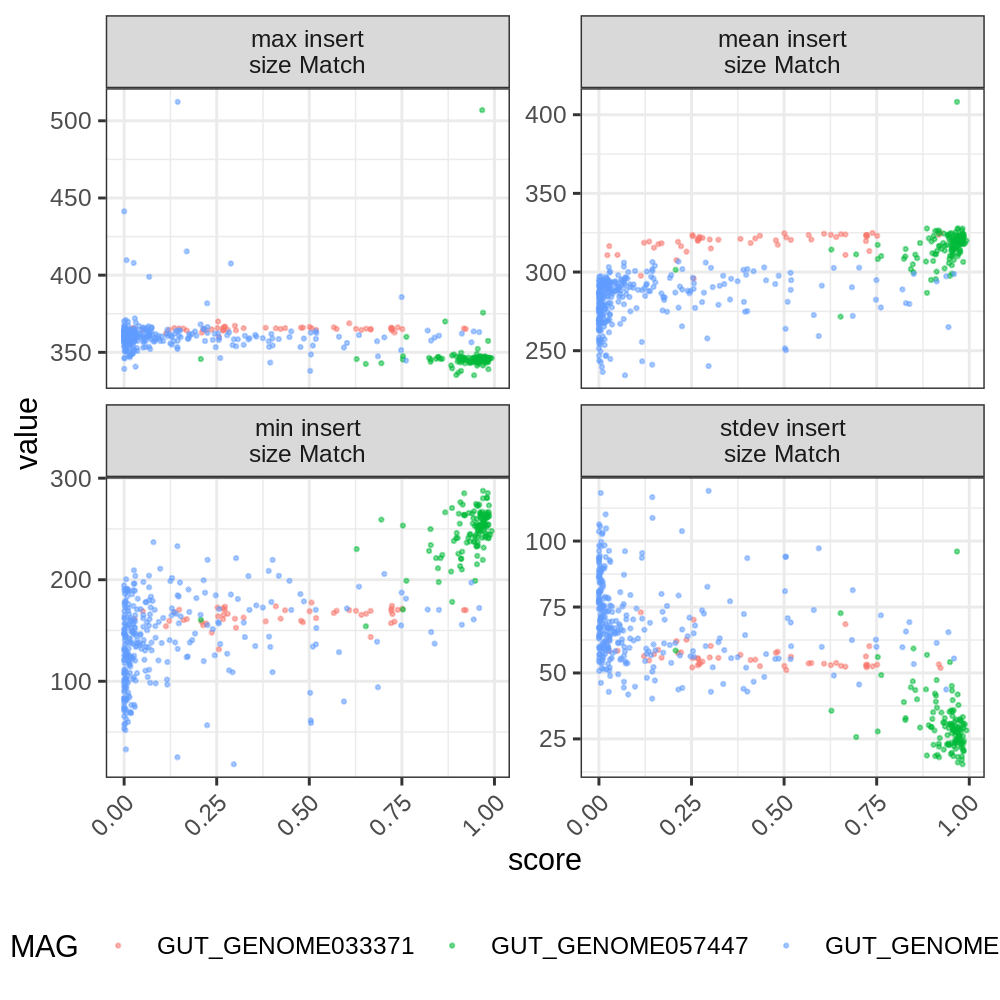

In [234]:
# all features for outlier 
p = feats_f %>%
    filter.(MAG %in% c('GUT_GENOME057447', 'GUT_GENOME033371', 'GUT_GENOME125161'))  %>%
    mutate.(contig_len = log10(contig_len)) %>%
    pivot_longer.(cols=c(-contig, -Sample, -MAG, -score)) %>%
    filter.(grepl('insert', name)) %>%
    mutate.(name = gsub('_', ' ', name),
            name = stringr::str_wrap(name, 12)) %>%
    ggplot(aes(score, value, color=MAG)) +
    geom_point(alpha=0.5, size=0.4) +
    #geom_smooth() +
    facet_wrap(~ name, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=45, hjust=1),
        legend.position = 'bottom'
    )
p.dims(5,5)
plot(p)

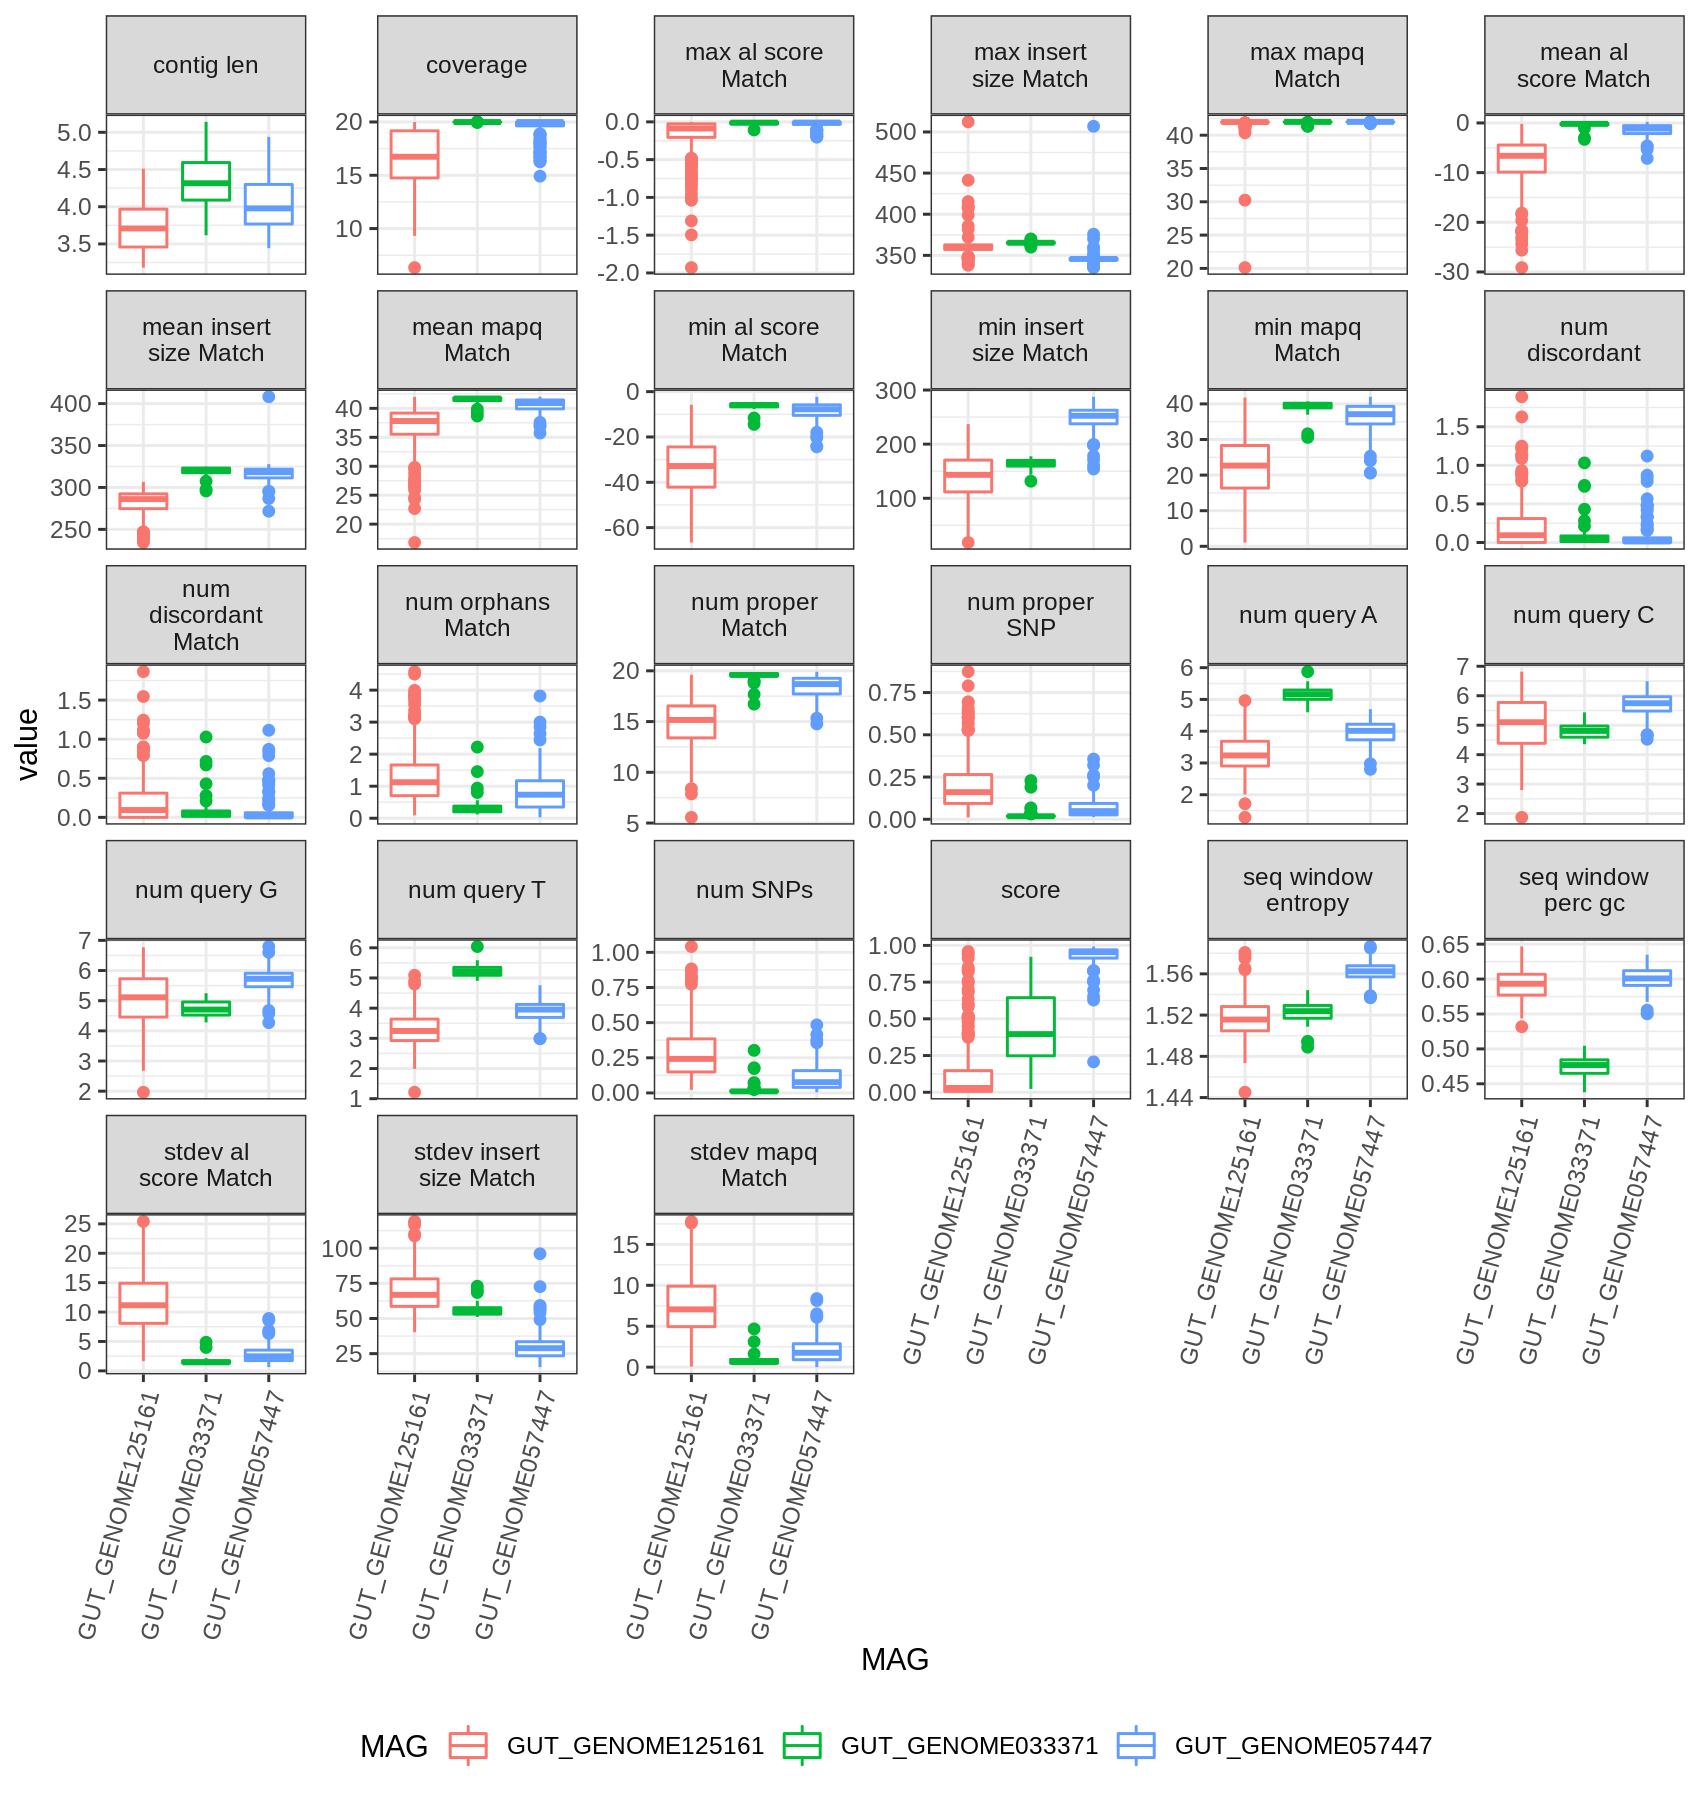

In [229]:
# all features for outlier 
p = feats_f %>%
    filter.(MAG %in% c('GUT_GENOME057447', 'GUT_GENOME033371', 'GUT_GENOME125161'))  %>%
    mutate.(contig_len = log10(contig_len)) %>%
    mutate.(mean_score = mean(score), .by=c(MAG)) %>%
    pivot_longer.(cols=c(-contig, -Sample, -MAG, -mean_score)) %>%
    mutate.(name = gsub('_', ' ', name),
            name = stringr::str_wrap(name, 12),
            MAG = reorder(MAG, mean_score)) %>%
    ggplot(aes(MAG, value, color=MAG)) +
    geom_boxplot() +
    facet_wrap(~ name, scales='free_y') +
    theme_bw() +
    theme(
        axis.text.x = element_text(angle=75, hjust=1),
        legend.position = 'bottom'
    )
p.dims(8.5,9)
plot(p)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



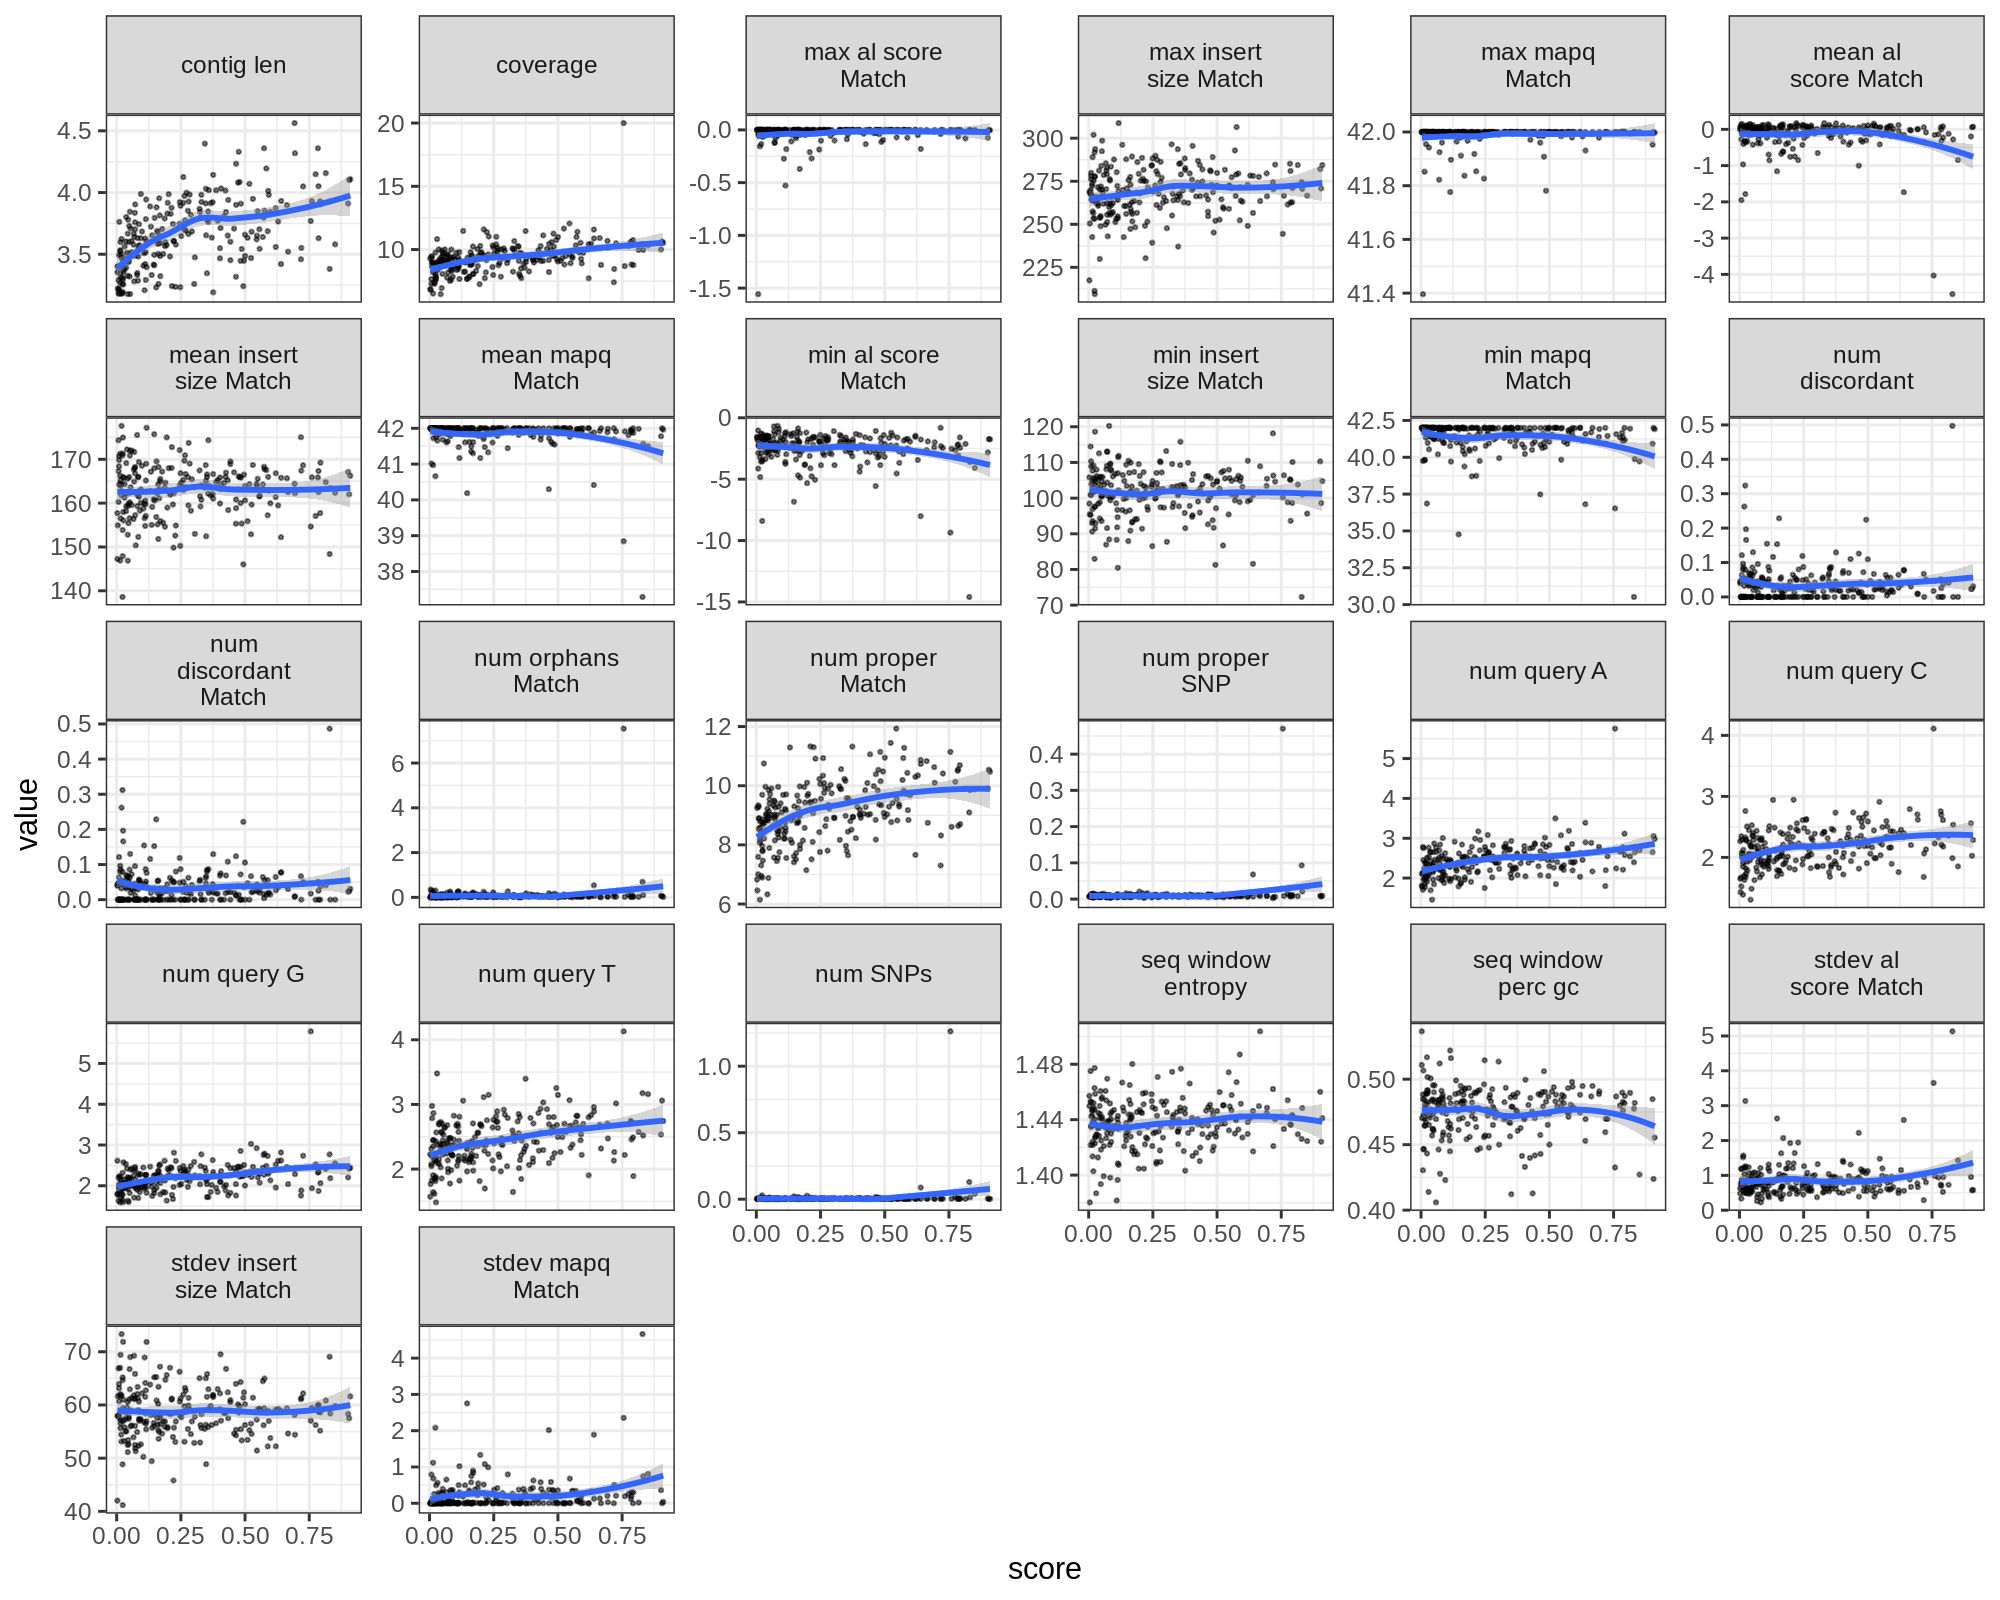

In [211]:
# all features for outlier 
p = feats_f %>%
    filter.(MAG == 'GUT_GENOME012103') %>%
    mutate.(contig_len = log10(contig_len)) %>%
    pivot_longer.(cols=c(-contig, -Sample, -MAG, -score)) %>%
    mutate.(name = gsub('_', ' ', name),
            name = stringr::str_wrap(name, 12)) %>%
    ggplot(aes(score, value)) +
    geom_point(alpha=0.5, size=0.4) +
    geom_smooth() +
    facet_wrap(~ name, scales='free_y') +
    theme_bw()
p.dims(10,8)
plot(p)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



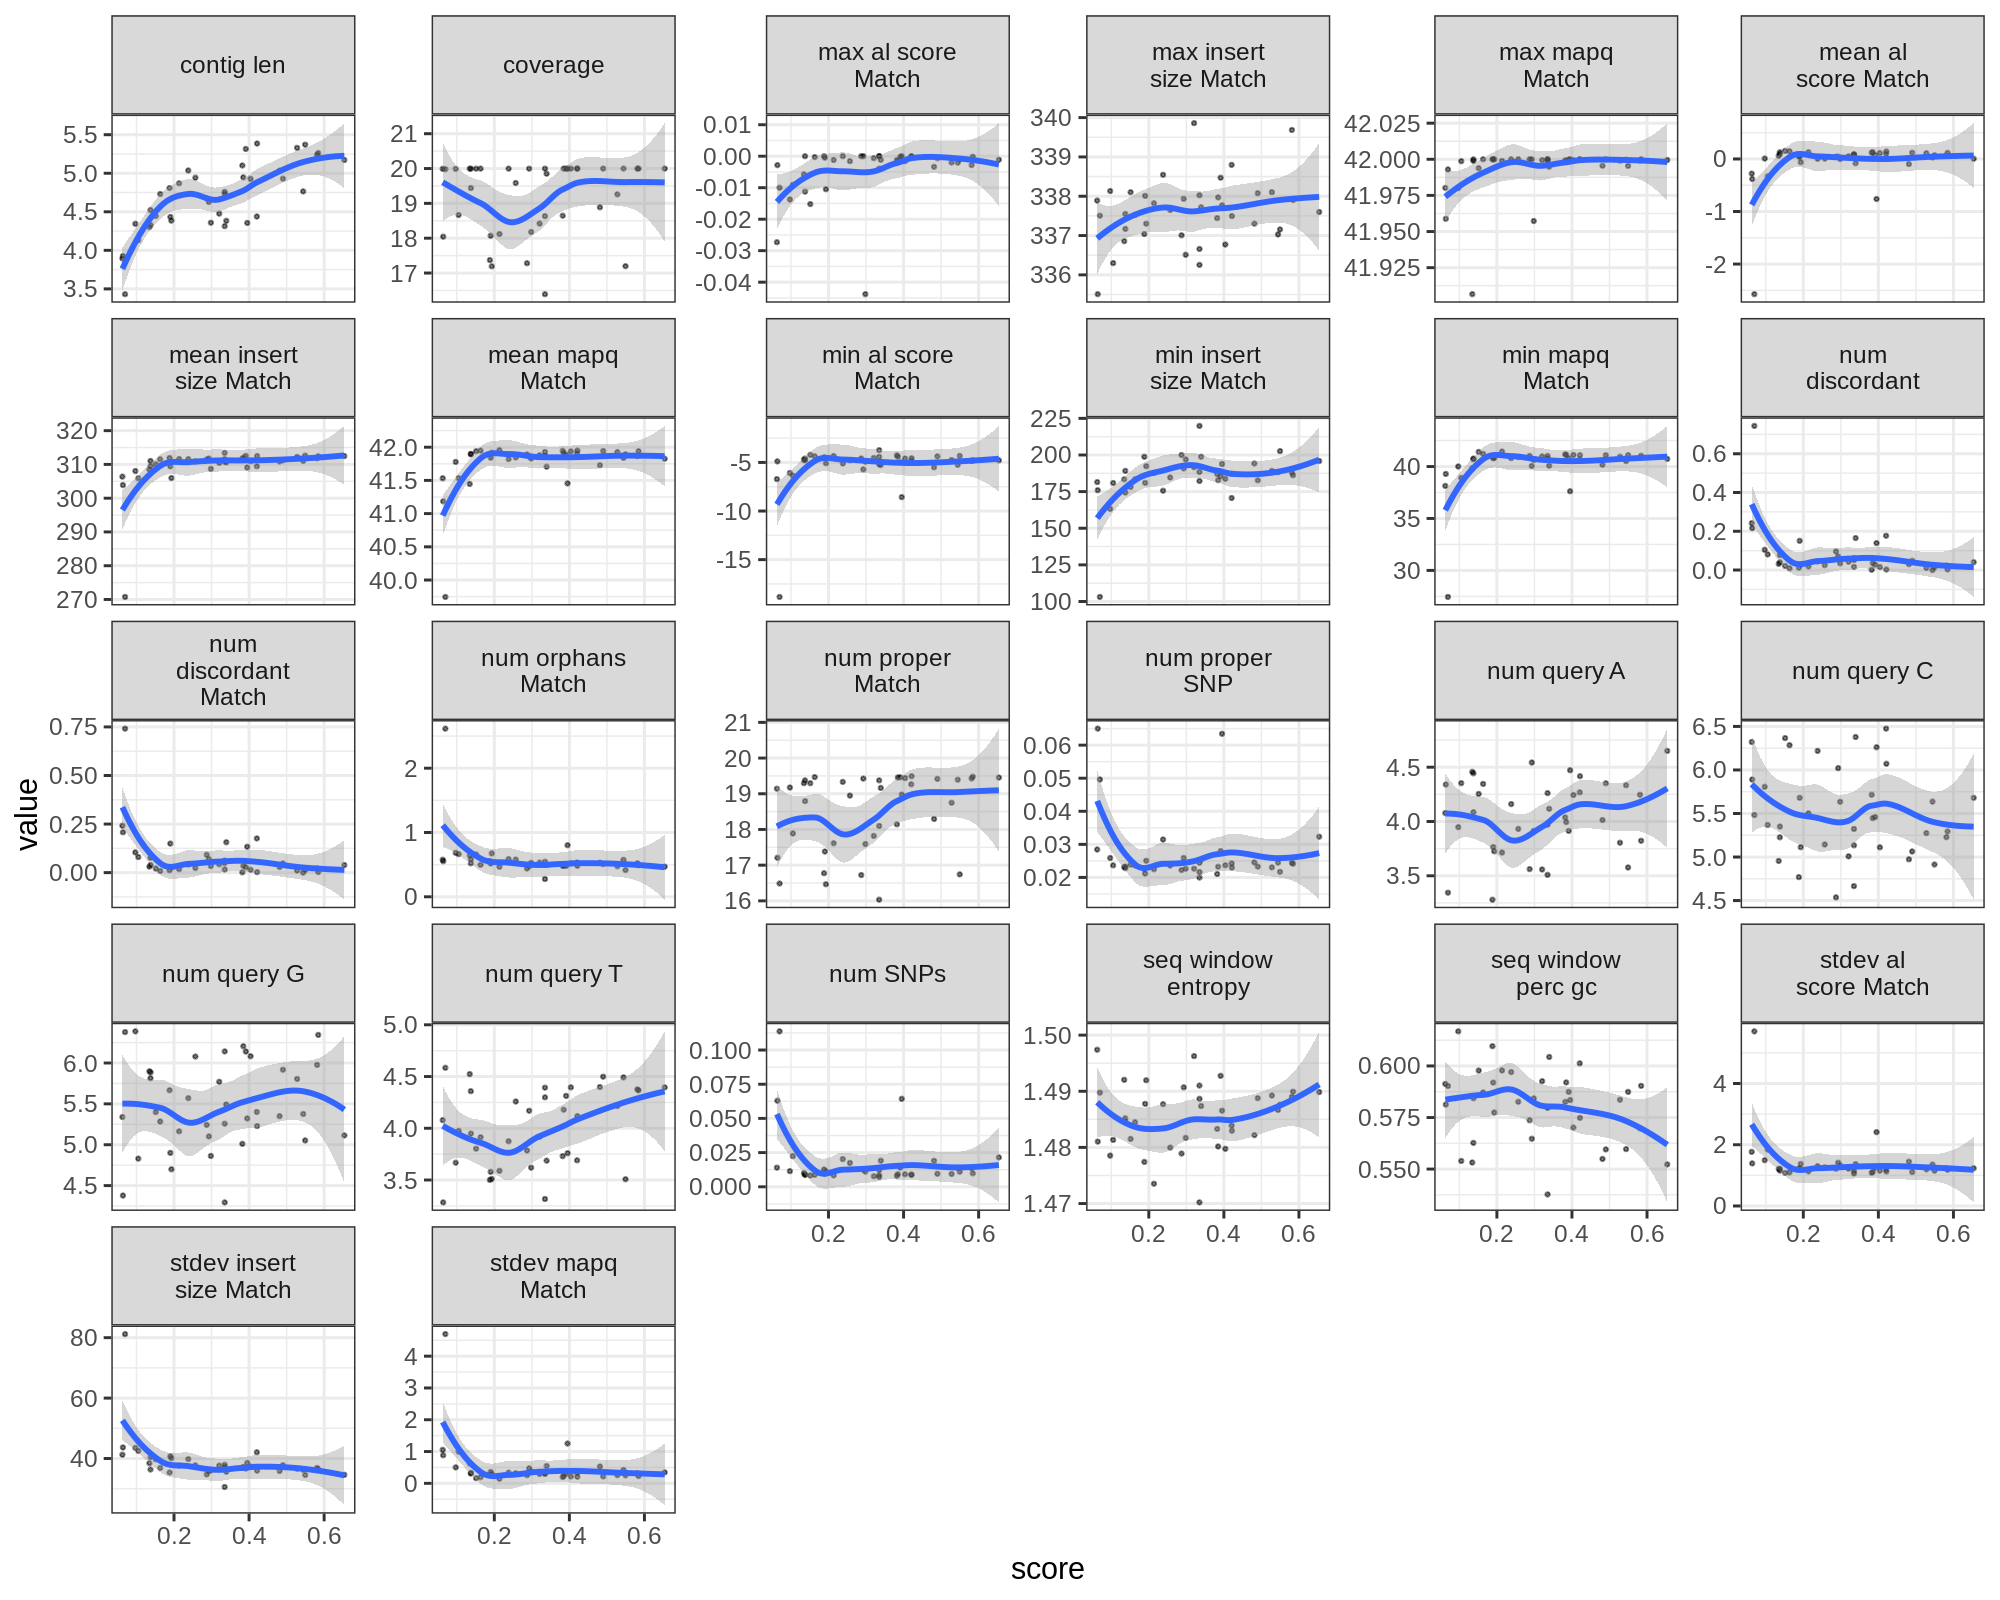

In [210]:
# all features for outlier 
p = feats_f %>%
    filter.(MAG == 'GUT_GENOME085145') %>%
    mutate.(contig_len = log10(contig_len)) %>%
    pivot_longer.(cols=c(-contig, -Sample, -MAG, -score)) %>%
    mutate.(name = gsub('_', ' ', name),
            name = stringr::str_wrap(name, 12)) %>%
    ggplot(aes(score, value)) +
    geom_point(alpha=0.5, size=0.4) +
    geom_smooth() +
    facet_wrap(~ name, scales='free_y') +
    theme_bw()
p.dims(10,8)
plot(p)